In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath
from scipy import linalg
from scipy.integrate import quad

# 3.1 Amplitud de Loschmidt

In [2]:
def Diag(delta):
    global N
    Matriz = np.zeros((N,N))

    a = 0 #diagonal
    b = 1 + delta #la que aparece despues
    c = 1 - delta #la que aparece primero

    for i in range(N):
        Matriz[i,i] = a
    for i in range(N-1):
        if (i%2 == 0):
            Matriz[i+1,i] = c
            Matriz[i,i+1] = c
        else:
            Matriz[i+1,i] = b
            Matriz[i,i+1] = b

    #Valores, MVectores = np.linalg.eig(Matriz)

    eig_vals, eig_vecs = np.linalg.eig(Matriz)

    eig_vals_sorted = np.sort(eig_vals)
    eig_vecs_sorted = eig_vecs[:, eig_vals.argsort()]
    D = np.identity(N)*eig_vals_sorted
    Q = np.asmatrix(eig_vecs_sorted)

    return D, Q, np.asmatrix(Matriz)

def Loschmidt_Amplitude_DensityMatrix(delta0, delta1, t):
    global N
    D1, U1, H1 = Diag(delta0)
    D2, U2, H2 = Diag(delta1)

    i = 0
    while D1[i,i] <= 0:
        i = i +1

    indice = i 
    #Ese es la energía del estado base:
    Vec_Est_Base = U1[:,indice]
    lambda_base = D1[indice,indice]

    LE = np.array([])
    rho_0 = np.outer(Vec_Est_Base,Vec_Est_Base)
    #print(np.trace(rho_0))
    LE = np.array([])
    for i in range(len(t)):
        vec_t = np.dot(linalg.expm((-1j)*t[i]*H2), Vec_Est_Base)
        rho_t = np.outer(vec_t,vec_t)
        #rho_t = linalg.expm((-1j)*t[i]*H2) @ rho_0 @ linalg.expm((1j)*t[i]*H2)   
        #print(np.trace(rho_t))
        Matriz = np.dot(rho_0, rho_t)
        valor = np.trace(Matriz)
        #valor = np.dot(np.transpose(Vec_Est_Base), vec_t)
        LE = np.append(LE, valor)
    return np.sqrt(np.abs(LE))

def Loschmidt_rate_DensityMatrix(delta0, delta1, t):
    LE = Loschmidt_Amplitude_DensityMatrix(delta0, delta1,t)
    return  (-1/N)*np.log(np.abs(LE)**2)

def Loschmidt_rate_Derivar_DensityMatrix(delta0,delta1,t):
    delta = 0.001

    return (Loschmidt_rate_DensityMatrix(delta0,delta1,t+delta)-Loschmidt_rate_DensityMatrix(delta0,delta1,t))/delta

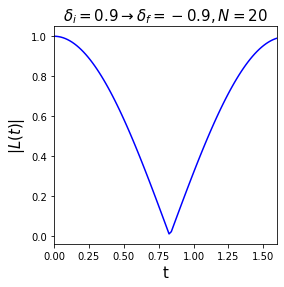

In [ ]:
delta0 = 0.9
delta1 = -0.9
N = 20

fig = plt.figure(figsize = (4,4))
t = np.linspace(0,1.6,100)
al = Loschmidt_Amplitude_DensityMatrix(delta0,delta1,t)
plt.plot(t,np.abs(al), c = "blue")
plt.ylabel(r'$| L(t) |$', fontsize = 15)
plt.xlabel("t", fontsize = 15)
plt.title(r'$\delta_{i} = 0.9 \rightarrow \delta_{f} = -0.9, N = 20$', fontsize = 15)
plt.xlim(0,np.max(t))

plt.savefig('Density_AMP_0.pdf', dpi=300, bbox_inches='tight')

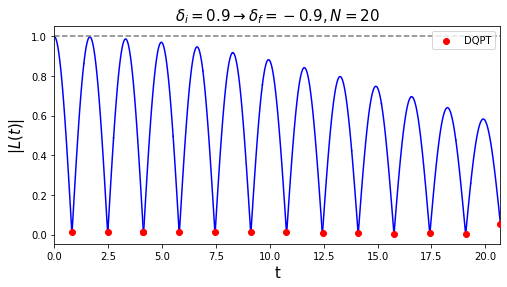

In [ ]:
delta0 = 0.9
delta1 = -0.9
N = 20

valores = np.array([0,1,2,3,4,5,6,7,9,10,11,12,13.5,14,15])*1.38
fig = plt.figure(figsize = (8,4))
for i in range(len(valores)-1):    
    t = np.linspace(valores[i],valores[i+1],100)
    al = Loschmidt_Amplitude_DensityMatrix(delta0,delta1,t)
    plt.plot(t,np.abs(al), c = "blue")
    if i==0:
        plt.scatter(t[np.argmin(np.abs(al))], np.min(np.abs(al)), zorder = 5,c = "red", label = "DQPT")
    else:
        plt.scatter(t[np.argmin(np.abs(al))], np.min(np.abs(al)), zorder = 5,c = "red")

plt.ylabel(r'$| L(t) |$', fontsize = 15)
plt.xlabel("t", fontsize = 15)
plt.title(r'$\delta_{i} = 0.9 \rightarrow \delta_{f} = -0.9, N = 20$', fontsize = 15)
plt.legend(loc = "upper right")
plt.xlim(0,np.max(t))

plt.plot([0, np.max(t)], [1,1], '--', c = "gray")
plt.savefig('Density_AMP_1.pdf', dpi=300, bbox_inches='tight')

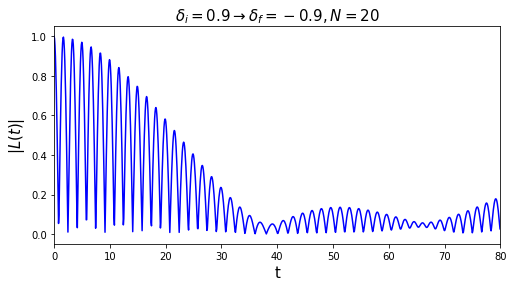

In [ ]:
t = np.linspace(0, 80, 1000)
al = Loschmidt_Amplitude_DensityMatrix(delta0,delta1,t)
fig = plt.figure(figsize = (8,4))
plt.plot(t,al, c ="blue")
plt.ylabel(r'$| L(t) |$', fontsize = 15)
plt.xlabel("t", fontsize = 15)
plt.title(r'$\delta_{i} = 0.9 \rightarrow \delta_{f} = -0.9, N = 20$', fontsize = 15)
plt.xlim(0,np.max(t))
plt.savefig('Density_AMP_2.pdf', dpi=300, bbox_inches='tight')

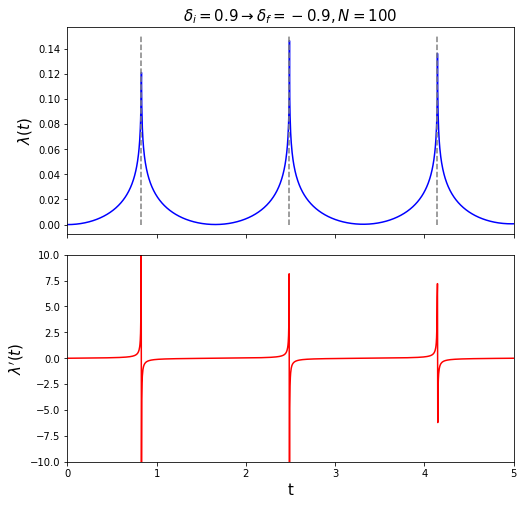

In [ ]:
delta0 = 0.9
delta1 = -0.9
N = 100

fig = plt.figure(figsize = (8,8))
gs = fig.add_gridspec(2, hspace=0.1)
axs = gs.subplots(sharex=True, sharey=False)

#fig, axs = plt.subplots()


t = np.linspace(0,5,1500)
l = Loschmidt_rate_DensityMatrix(delta0,delta1,t)
axs[0].plot(t,l, c = "blue")
axs[0].set_ylabel(r'$ \lambda (t) $', fontsize = 15)
axs[0].set_title(r'$\delta_{i} = 0.9 \rightarrow \delta_{f} = -0.9, N = 100$', fontsize = 15)

t1 = np.linspace(0,1,200)
l1 = Loschmidt_rate_DensityMatrix(delta0,delta1,t1)
t1_max = t1[np.argmax(l1)]
t2 = np.linspace(2,3,200)
l2 = Loschmidt_rate_DensityMatrix(delta0,delta1,t2)
t2_max = t2[np.argmax(l2)]
t3 = np.linspace(4,5,200)
l3 = Loschmidt_rate_DensityMatrix(delta0,delta1,t3)
t3_max = t3[np.argmax(l3)]
axs[0].plot([t1_max,t1_max], [0,0.15], '--', c = "gray")
axs[0].plot([t2_max,t2_max], [0,0.15], '--', c = "gray")
axs[0].plot([t3_max,t3_max], [0,0.15], '--', c = "gray")
axs[0].set_xlim(0,np.max(t))

lprime = Loschmidt_rate_Derivar_DensityMatrix(delta0,delta1,t)
axs[1].plot(t,lprime, c = "red")
axs[1].set_ylabel(r'$ \lambda^{\prime} (t) $', fontsize = 15)
axs[1].set_xlabel("t", fontsize = 15)
axs[1].set_ylim(-10,10)
axs[1].set_xlim(0,np.max(t))

plt.savefig('Density_rate_Rate_and_Prime_1.pdf', dpi=300, bbox_inches='tight')

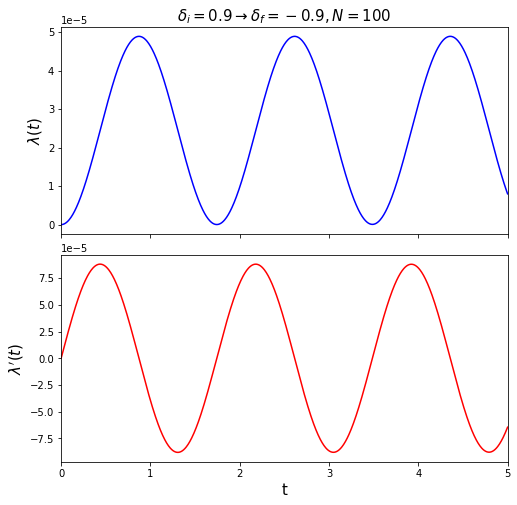

In [ ]:
#Lo mismo pero para el primer estado excitado:

def Loschmidt_Amplitude_DensityMatrix(delta0, delta1, t):
    global N
    D1, U1, H1 = Diag(delta0)
    D2, U2, H2 = Diag(delta1)

    i = 0
    while D1[i,i] <= 0:
        i = i + 1

    indice = i + 2
    #Ese es la energía del primer estado excitado:
    Vec_Est_Base = U1[:,indice]
    lambda_base = D1[indice,indice]

    LE = np.array([])
    rho_0 = np.outer(Vec_Est_Base,Vec_Est_Base)
    #print(np.trace(rho_0))
    LE = np.array([])
    for i in range(len(t)):
        vec_t = np.dot(linalg.expm((-1j)*t[i]*H2), Vec_Est_Base)
        rho_t = np.outer(vec_t,vec_t)
        #rho_t = linalg.expm((-1j)*t[i]*H2) @ rho_0 @ linalg.expm((1j)*t[i]*H2)   
        #print(np.trace(rho_t))
        Matriz = np.dot(rho_0, rho_t)
        valor = np.trace(Matriz)
        LE = np.append(LE, valor)
    return np.sqrt(np.abs(LE))

delta0 = 0.9
delta1 = -0.9
N = 100

fig = plt.figure(figsize = (8,8))
gs = fig.add_gridspec(2, hspace=0.1)
axs = gs.subplots(sharex=True, sharey=False)

t = np.linspace(0,5,1000)
l = Loschmidt_rate_DensityMatrix(delta0,delta1,t)
axs[0].plot(t,l, c = "blue")
axs[0].set_ylabel(r'$ \lambda (t) $', fontsize = 15)
axs[0].set_title(r'$\delta_{i} = 0.9 \rightarrow \delta_{f} = -0.9, N = 100$', fontsize = 15)
axs[0].set_xlim(0,np.max(t))

lprime = Loschmidt_rate_Derivar_DensityMatrix(delta0,delta1,t)
axs[1].plot(t,lprime, c = "red")
axs[1].set_ylabel(r'$ \lambda^{\prime} (t) $', fontsize = 15)
axs[1].set_xlabel("t", fontsize = 15)
#axs[1].set_ylim(-10,10)
plt.savefig('Density_rate_Rate_and_Prime_2.pdf', dpi=300, bbox_inches='tight')

# 3.2.1 Condiciones de frontera periódicas (PBC)

In [27]:
# delta - dimerización o anisotropia
# J - Hopping, como aqui ya el tiempo es una variable es mejor llamarlo J
# t - tiempo

def eps_k(delta,J,k): #1zb = -pi,pi
    v = (1-delta)*J
    w = (1+delta)*J
    return np.sqrt(v**2 + w**2 + 2*v*w*np.cos(k))

def d_unitario(delta,J,k):
    v = (1-delta)*J
    w = (1+delta)*J
    d = np.array([v + w*np.cos(k), w*np.sin(k), 0])
    norma = np.sqrt(np.dot(d,d))
    return d/norma

def L_k(delta0, delta1, J, k, t):
    return np.cos(eps_k(delta1,J,k)*t) + 1j*np.dot(d_unitario(delta0,J,k),d_unitario(delta1,J,k))*np.sin(eps_k(delta1,J,k)*t)

def L_PBC(delta0, delta1, J, N, t):
    N_2 = int(N/2)
    L = np.array([])
    for n in range(-1*N_2,N_2):
    #for n in range(0,N_2):

        k = n*2*np.pi/N #Primera zona de Brillouin
        L = np.append(L,L_k(delta0, delta1, J, k, t))
    return np.prod(L)

def Loschmidt_rate_PBC(delta0,delta1,J,N,t):
    l_t = np.array([])
    for i in range(len(t)):
        L_t = L_PBC(delta0, delta1, J, N, t[i])
        l_t = np.append(l_t,L_t)
    return (-1/N)*np.log(np.abs(l_t)**2)

def Loschmidt_rate_Derivar_PBC(delta0,delta1,J,N,t):
    delta = 0.001
    return (Loschmidt_rate_PBC(delta0,delta1,J,N,t+delta)-Loschmidt_rate_PBC(delta0,delta1,J,N,t))/delta

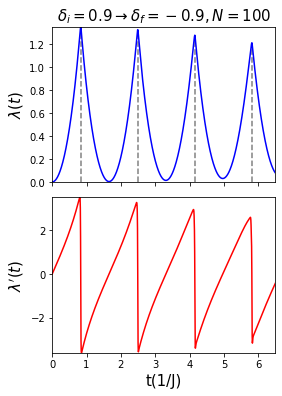

In [28]:
delta0 = 0.9
delta1 = -0.9
J = 1
N = 100
t = np.linspace(0,6.5,2000)
l = Loschmidt_rate_PBC(delta0,delta1,J,N,t)
lprima = Loschmidt_rate_Derivar_PBC(delta0,delta1,J,N,t)

fig = plt.figure(figsize = (4,6))
gs = fig.add_gridspec(2, hspace=0.1)
axs = gs.subplots(sharex=True, sharey=False)

tc = t[np.argmax(l)]
tcs = np.array([0,2,4,6,8])*tc
for i in range(len(tcs)-1):
    ti = np.linspace(tcs[i], tcs[i+1], 200)
    li = Loschmidt_rate_PBC(delta0,delta1,J,N,ti)
    timax = ti[np.argmax(li)]
    axs[0].plot([timax,timax], [0,np.max(li)], '--', c = "gray")

axs[0].plot(t,l, c = "blue")
axs[1].plot(t,lprima, c = "red")
axs[0].set_ylabel(r'$\lambda (t) $',fontsize= 15)
axs[1].set_ylabel(r'$\lambda^{\prime} (t) $',fontsize= 15)
axs[1].set_xlabel('t(1/J)',fontsize= 15)
axs[0].set_title(r'$\delta_{i} = 0.9 \rightarrow \delta_{f} = -0.9, N = 100$',fontsize= 15)
axs[0].set_ylim(0, np.max(l))
axs[1].set_ylim(np.min(lprima), np.max(lprima))
axs[0].set_xlim(0, np.max(t))
axs[1].set_xlim(0, np.max(t))

plt.savefig('LE_PBC_1.pdf', dpi=600, bbox_inches='tight')

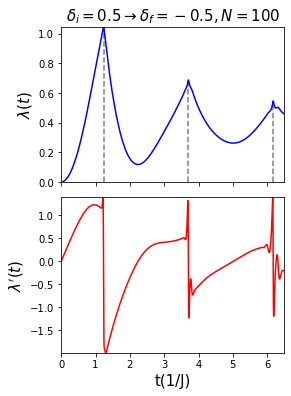

In [29]:
delta0 = 0.5
delta1 = -0.5
J = 1
N = 100
t = np.linspace(0,6.5,2000)
l = Loschmidt_rate_PBC(delta0,delta1,J,N,t)
lprima = Loschmidt_rate_Derivar_PBC(delta0,delta1,J,N,t)

fig = plt.figure(figsize = (4,6))
gs = fig.add_gridspec(2, hspace=0.1)
axs = gs.subplots(sharex=True, sharey=False)

tc = t[np.argmax(l)]
tcs = np.array([0,2,4,6])*tc
for i in range(len(tcs)-1):
    ti = np.linspace(tcs[i], tcs[i+1], 200)
    li = Loschmidt_rate_PBC(delta0,delta1,J,N,ti)
    timax = ti[np.argmax(li)]
    axs[0].plot([timax,timax], [0,np.max(li)], '--', c = "gray")

axs[0].plot(t,l, c = "blue")
axs[1].plot(t,lprima, c = "red")
axs[0].set_ylabel(r'$\lambda (t) $',fontsize= 15)
axs[1].set_ylabel(r'$\lambda^{\prime} (t) $',fontsize= 15)
axs[1].set_xlabel('t(1/J)',fontsize= 15)
axs[0].set_title(r'$\delta_{i} = 0.5 \rightarrow \delta_{f} = -0.5, N = 100$',fontsize= 15)
axs[0].set_ylim(0, np.max(l))
axs[1].set_ylim(np.min(lprima), np.max(lprima))
axs[0].set_xlim(0, np.max(t))
axs[1].set_xlim(0, np.max(t))

plt.savefig('LE_PBC_2.pdf', dpi=600, bbox_inches='tight')

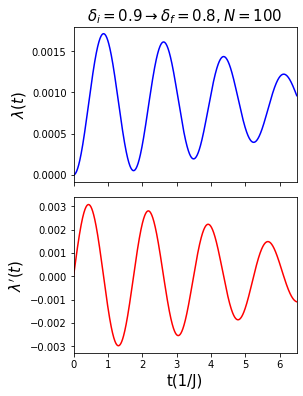

In [30]:
delta0 = 0.9
delta1 = 0.8
J = 1
N = 100
t = np.linspace(0,6.5,2000)
l = Loschmidt_rate_PBC(delta0,delta1,J,N,t)
lprima = Loschmidt_rate_Derivar_PBC(delta0,delta1,J,N,t)

fig = plt.figure(figsize = (4,6))
gs = fig.add_gridspec(2, hspace=0.1)
axs = gs.subplots(sharex=True, sharey=False)

axs[0].plot(t,l, c = "blue")
axs[1].plot(t,lprima, c = "red")
axs[0].set_ylabel(r'$\lambda (t) $',fontsize= 15)
axs[1].set_ylabel(r'$\lambda^{\prime} (t) $',fontsize= 15)
axs[1].set_xlabel('t(1/J)',fontsize= 15)
axs[0].set_title(r'$\delta_{i} = 0.9 \rightarrow \delta_{f} = 0.8, N = 100$',fontsize= 15)
axs[0].set_xlim(0, np.max(t))
axs[1].set_xlim(0, np.max(t))

plt.savefig('LE_PBC_3.pdf', dpi=600, bbox_inches='tight')

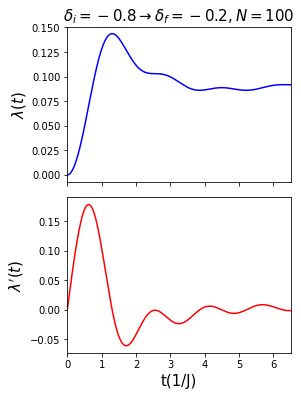

In [31]:
delta0 = -0.8
delta1 = -0.2
J = 1
N = 100
t = np.linspace(0,6.5,2000)
l = Loschmidt_rate_PBC(delta0,delta1,J,N,t)
lprima = Loschmidt_rate_Derivar_PBC(delta0,delta1,J,N,t)

fig = plt.figure(figsize = (4,6))
gs = fig.add_gridspec(2, hspace=0.1)
axs = gs.subplots(sharex=True, sharey=False)

axs[0].plot(t,l, c = "blue")
axs[1].plot(t,lprima, c = "red")
axs[0].set_ylabel(r'$\lambda (t) $',fontsize= 15)
axs[1].set_ylabel(r'$\lambda^{\prime} (t) $',fontsize= 15)
axs[1].set_xlabel('t(1/J)',fontsize= 15)
axs[0].set_title(r'$\delta_{i} = -0.8 \rightarrow \delta_{f} = -0.2, N = 100$',fontsize= 15)
axs[0].set_xlim(0, np.max(t))
axs[1].set_xlim(0, np.max(t))

plt.savefig('LE_PBC_4.pdf', dpi=600, bbox_inches='tight')

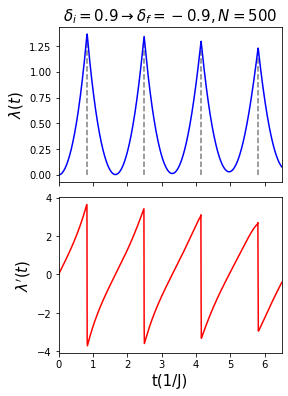

In [32]:
delta0 = 0.9
delta1 = -0.9
J = 1
N = 500
t = np.linspace(0,6.5,1000)
l = Loschmidt_rate_PBC(delta0,delta1,J,N,t)
lprima = Loschmidt_rate_Derivar_PBC(delta0,delta1,J,N,t)

fig = plt.figure(figsize = (4,6))
gs = fig.add_gridspec(2, hspace=0.1)
axs = gs.subplots(sharex=True, sharey=False)

tc = t[np.argmax(l)]
tcs = np.array([0,2,4,6,8])*tc
for i in range(len(tcs)-1):
    ti = np.linspace(tcs[i], tcs[i+1], 200)
    li = Loschmidt_rate_PBC(delta0,delta1,J,N,ti)
    timax = ti[np.argmax(li)]
    axs[0].plot([timax,timax], [0,np.max(li)], '--', c = "gray")

axs[0].plot(t,l, c = "blue")
axs[1].plot(t,lprima, c = "red")
axs[0].set_ylabel(r'$\lambda (t) $',fontsize= 15)
axs[1].set_ylabel(r'$\lambda^{\prime} (t) $',fontsize= 15)
axs[1].set_xlabel('t(1/J)',fontsize= 15)
axs[0].set_title(r'$\delta_{i} = 0.9 \rightarrow \delta_{f} = -0.9, N = 500$',fontsize= 15)
axs[0].set_xlim(0, np.max(t))
axs[1].set_xlim(0, np.max(t))

plt.savefig('LE_PBC_5.pdf', dpi=600, bbox_inches='tight')

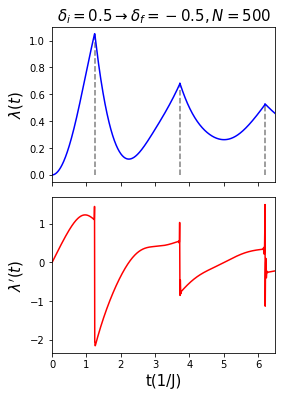

In [33]:
delta0 = 0.5
delta1 = -0.5
J = 1
N = 500
t = np.linspace(0,6.5,1000)
l = Loschmidt_rate_PBC(delta0,delta1,J,N,t)
lprima = Loschmidt_rate_Derivar_PBC(delta0,delta1,J,N,t)

fig = plt.figure(figsize = (4,6))
gs = fig.add_gridspec(2, hspace=0.1)
axs = gs.subplots(sharex=True, sharey=False)

tc = t[np.argmax(l)]
tcs = np.array([0,2,4,6,8])*tc
for i in range(len(tcs)-1):
    ti = np.linspace(tcs[i], tcs[i+1], 200)
    li = Loschmidt_rate_PBC(delta0,delta1,J,N,ti)
    timax = ti[np.argmax(li)]
    axs[0].plot([timax,timax], [0,np.max(li)], '--', c = "gray")

axs[0].plot(t,l, c = "blue")
axs[1].plot(t,lprima, c = "red")
axs[0].set_ylabel(r'$\lambda (t) $',fontsize= 15)
axs[1].set_ylabel(r'$\lambda^{\prime} (t) $',fontsize= 15)
axs[1].set_xlabel('t(1/J)',fontsize= 15)
axs[0].set_title(r'$\delta_{i} = 0.5 \rightarrow \delta_{f} = -0.5, N = 500$',fontsize= 15)
axs[0].set_xlim(0, np.max(t))
axs[1].set_xlim(0, np.max(t))

plt.savefig('LE_PBC_6.pdf', dpi=600, bbox_inches='tight')

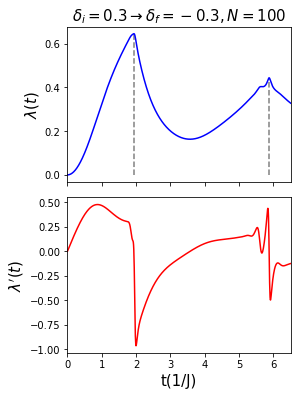

In [34]:
delta0 = 0.3
delta1 = -0.3
J = 1
N = 100
t = np.linspace(0,6.5,1000)
l = Loschmidt_rate_PBC(delta0,delta1,J,N,t)
lprima = Loschmidt_rate_Derivar_PBC(delta0,delta1,J,N,t)

fig = plt.figure(figsize = (4,6))
gs = fig.add_gridspec(2, hspace=0.1)
axs = gs.subplots(sharex=True, sharey=False)
#fig, axs = plt.subplots(2, figsize = (4,6))

tc = t[np.argmax(l)]
tcs = np.array([0,2,4,6,8])*tc
for i in range(len(tcs)-1):
    ti = np.linspace(tcs[i], tcs[i+1], 200)
    li = Loschmidt_rate_PBC(delta0,delta1,J,N,ti)
    timax = ti[np.argmax(li)]
    axs[0].plot([timax,timax], [0,np.max(li)], '--', c = "gray")

axs[0].plot(t,l, c = "blue")
axs[1].plot(t,lprima, c = "red")
axs[0].set_ylabel(r'$\lambda (t) $',fontsize= 15)
axs[1].set_ylabel(r'$\lambda^{\prime} (t) $',fontsize= 15)
axs[1].set_xlabel('t(1/J)',fontsize= 15)
axs[0].set_title(r'$\delta_{i} = 0.3 \rightarrow \delta_{f} = -0.3, N = 100$',fontsize= 15)
axs[0].set_xlim(0, np.max(t))
axs[1].set_xlim(0, np.max(t))

plt.savefig('LE_PBC_7.pdf', dpi=600, bbox_inches='tight')

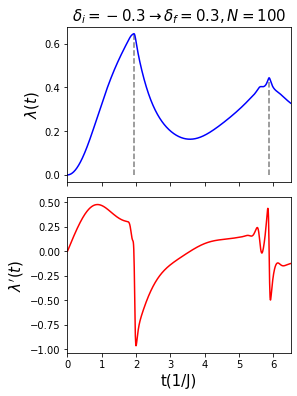

In [35]:
delta0 = -0.3
delta1 = 0.3
J = 1
N = 100
t = np.linspace(0,6.5,1000)
l = Loschmidt_rate_PBC(delta0,delta1,J,N,t)
lprima = Loschmidt_rate_Derivar_PBC(delta0,delta1,J,N,t)

fig = plt.figure(figsize = (4,6))
gs = fig.add_gridspec(2, hspace=0.1)
axs = gs.subplots(sharex=True, sharey=False)
#fig, axs = plt.subplots(2, figsize = (4,6))

tc = t[np.argmax(l)]
tcs = np.array([0,2,4,6,8])*tc
for i in range(len(tcs)-1):
    ti = np.linspace(tcs[i], tcs[i+1], 200)
    li = Loschmidt_rate_PBC(delta0,delta1,J,N,ti)
    timax = ti[np.argmax(li)]
    axs[0].plot([timax,timax], [0,np.max(li)], '--', c = "gray")

axs[0].plot(t,l, c = "blue")
axs[1].plot(t,lprima, c = "red")
axs[0].set_ylabel(r'$\lambda (t) $',fontsize= 15)
axs[1].set_ylabel(r'$\lambda^{\prime} (t) $',fontsize= 15)
axs[1].set_xlabel('t(1/J)',fontsize= 15)
axs[0].set_title(r'$\delta_{i} = -0.3 \rightarrow \delta_{f} = 0.3, N = 100$',fontsize= 15)
axs[0].set_xlim(0, np.max(t))
axs[1].set_xlim(0, np.max(t))

plt.savefig('LE_PBC_8.pdf', dpi=600, bbox_inches='tight')

(0.0, 1.4)

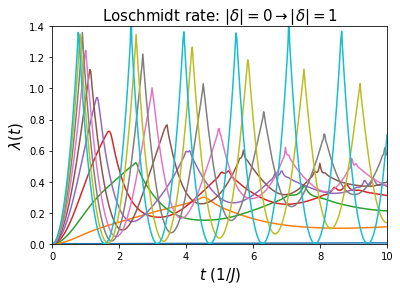

In [ ]:
fig = plt.figure(figsize=(6,4))

J = 1
N = 100
t = np.linspace(0,10,400)

cantidad = 10

deltas0 = np.linspace(0.01,1,cantidad)
deltas1 = deltas0*-1

#Este es el codigo del gif de la presentación del seminario.

for i in range(len(deltas0)):
    #plt.clf()
    l = Loschmidt_rate_PBC(deltas0[i],deltas1[i],J,N,t)
    plt.plot(t,l )
    plt.title('Loschmidt rate: ' + r'$ |\delta|= 0 \rightarrow |\delta|= 1 $',fontsize= 15)
    plt.xlim((0,10))
    plt.grid()
    plt.xlabel('t',fontsize= 12)
    
    #if(i < 9):
        #plt.savefig("Imagen0" + str(i + 1) + ".jpg")  
    #else:
        #plt.savefig("Imagen" + str(i + 1) + ".jpg")  
        
plt.xlabel(r'$t (1/J)$',fontsize= 15)
plt.ylabel(r'$\lambda(t)$',fontsize= 15)
plt.ylim(0,1.4)

In [ ]:
J = 1
N = 100
cantidad = 300
t = np.linspace(0,10,cantidad)
deltas0 = np.linspace(0,1,cantidad)
deltas1 = deltas0*-1

Matriz = np.zeros((cantidad,cantidad))

for i in range(len(deltas0)):
    Matriz[i,0:cantidad] = Loschmidt_rate_PBC(deltas0[i],deltas1[i],J,N,t)

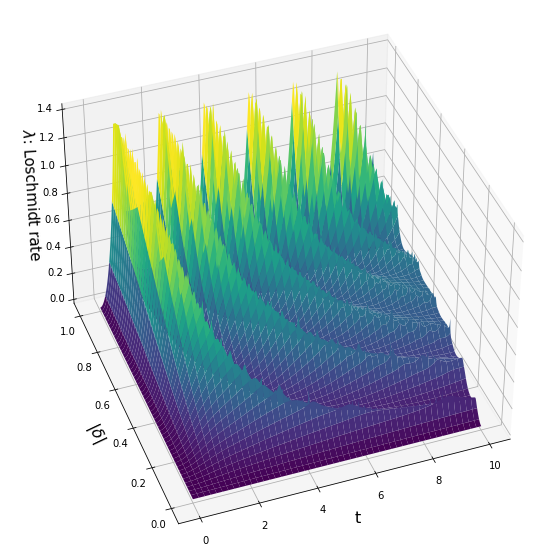

In [ ]:
t = np.linspace(0,10,cantidad)
deltas0 = np.linspace(0,1,cantidad)
t, deltas0 = np.meshgrid(t, deltas0)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(10,10))
surf1 = ax.plot_surface(t, deltas0, Matriz,cmap=plt.cm.viridis)
ax.view_init(40,-110)
ax.grid()
ax.set_xlabel('t', fontsize= 16)
ax.set_ylabel(r'$ |\delta| $', fontsize= 16)
ax.set_zlabel(r'$\lambda$' + ': Loschmidt rate', fontsize= 15)
plt.savefig('LE_PBC_3D_1.pdf', dpi=300, bbox_inches='tight')

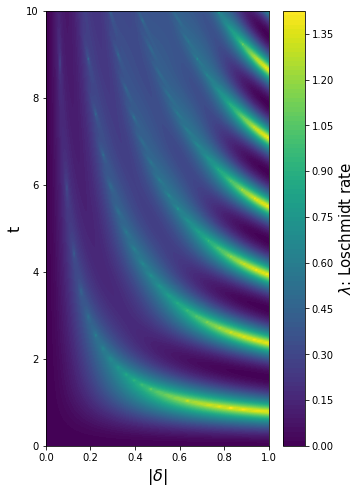

In [ ]:
fig = plt.figure(figsize=(5,8))

plt.contourf(deltas0, t, Matriz,100, cmap=plt.cm.viridis)
plt.ylabel('t', fontsize= 16)
plt.xlabel(r'$ |\delta| $', fontsize= 16)
cbar = plt.colorbar()
cbar.set_label(r'$\lambda$' + ': Loschmidt rate', fontsize= 15)
plt.savefig('LE_PBC_3D_2.pdf', dpi=600, bbox_inches='tight')

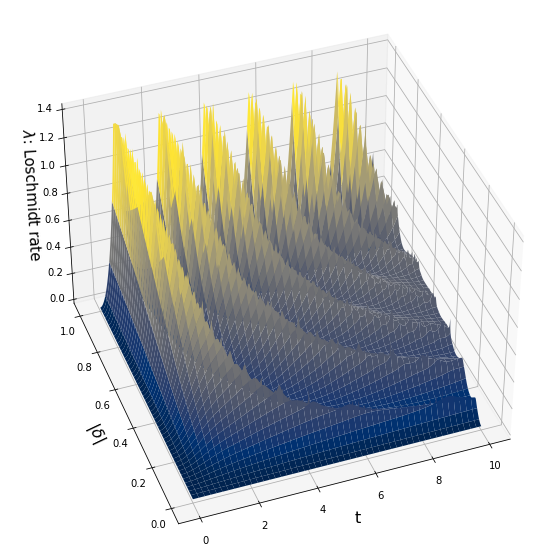

In [ ]:
t = np.linspace(0,10,cantidad)
deltas0 = np.linspace(0,1,cantidad)
t, deltas0 = np.meshgrid(t, deltas0)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(10,10))
surf1 = ax.plot_surface(t, deltas0, Matriz,cmap=plt.cm.cividis)
ax.view_init(40,-110)
ax.grid()
ax.set_xlabel('t', fontsize= 16)
ax.set_ylabel(r'$ |\delta| $', fontsize= 16)
ax.set_zlabel(r'$\lambda$' + ': Loschmidt rate', fontsize= 15)
plt.savefig('LE_PBC_3D_3.pdf', dpi=300, bbox_inches='tight')

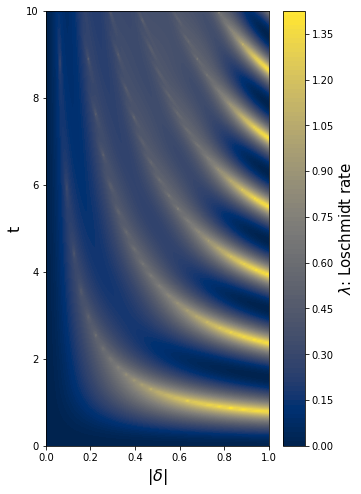

In [ ]:
fig = plt.figure(figsize=(5,8))

plt.contourf(deltas0, t, Matriz,100, cmap=plt.cm.cividis)
plt.ylabel('t', fontsize= 16)
plt.xlabel(r'$ |\delta| $', fontsize= 16)
cbar = plt.colorbar()
cbar.set_label(r'$\lambda$' + ': Loschmidt rate', fontsize= 15)
plt.savefig('LE_PBC_3D_4.pdf', dpi=600, bbox_inches='tight')

## 3.2.1.1 Ceros de Fisher

In [7]:
def tcritico(delta0,delta1,J,k,n):
    d0 = d_unitario(delta0,J,k)
    d1 = d_unitario(delta1,J,k)
    return abs((np.pi/eps_k(delta1,J,k))*(n+0.5) + 1j*np.arctanh(np.dot(d0,d1))/eps_k(delta1,J,k))

def tcritico_LPBC(delta0,delta1,J,n,N):
    N_2 = int(N/2)
    arregloK = np.array([])
    for it in range(-1*N_2,N_2):
        k = it*2*np.pi/N #Primera zona de Brillouin
        arregloK = np.append(arregloK,k)
    arreglo_dot = np.array([])
    for i in range(len(arregloK)):
        d0 = d_unitario(delta0,J,arregloK[i])
        d1 = d_unitario(delta1,J,arregloK[i])
        arreglo_dot = np.append(arreglo_dot, np.abs(np.dot(d0,d1)))
    
    kmin = arregloK[arreglo_dot.argmin()]
    return tcritico(delta0,delta1,J,kmin,n)        

<Figure size 504x360 with 0 Axes>

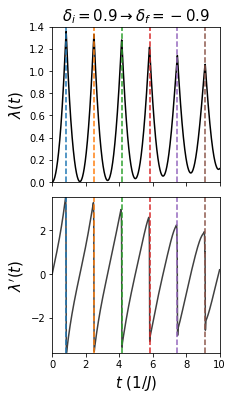

In [ ]:
fig = plt.figure(figsize=(7,5))
delta0 = 0.9
delta1 = -0.9
J = 1
N = 100
t = np.linspace(0,10,1000)
l = Loschmidt_rate_PBC(delta0,delta1,J,N,t)
lprima = Loschmidt_rate_Derivar_PBC(delta0,delta1,J,N,t)

fig = plt.figure(figsize = (3,6))
gs = fig.add_gridspec(2, hspace=0.1)
axs = gs.subplots(sharex=True, sharey=False)
#fig, axs = plt.subplots(2, figsize = (3,6))

axs[0].plot(t,l, c = 'black')
axs[0].set_ylabel(r'$\lambda(t)$',fontsize= 15)
axs[0].set_title(r'$\delta_{i} = 0.9 \rightarrow \delta_{f} = -0.9$',fontsize= 15)
axs[0].set_xlim((0,10))
axs[0].set_ylim((0,1.4))

axs[1].plot(t,lprima, c = '0.25')
axs[1].set_ylabel(r'$\lambda^{\prime}(t)$',fontsize= 15)
axs[1].set_xlim((0,10))
axs[1].set_xlabel(r'$t (1/J)$',fontsize= 15)
axs[1].set_ylim(np.min(lprima),np.max(lprima))


#plt.grid()

for i in range(6):
    tc = tcritico_LPBC(delta0,delta1,1,i,N)
    etiqueta = "m = " + str(i)
    axs[0].plot([tc,tc], [0,1.4], '--',label = etiqueta)
    axs[1].plot([tc,tc], [np.min(lprima),np.max(lprima)], '--')

#axs[0].legend(fontsize= 12, loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig('Fisher_1.pdf', dpi=300, bbox_inches='tight')


<Figure size 504x360 with 0 Axes>

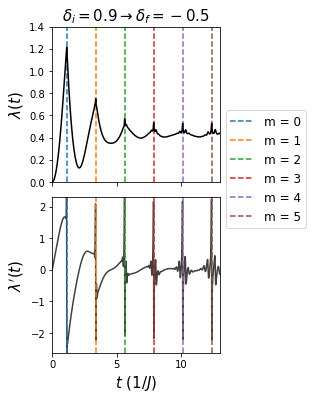

In [ ]:
fig = plt.figure(figsize=(7,5))
delta0 = 0.9
delta1 = - 0.5
J = 1
N = 100
t = np.linspace(0,13,3000)
l = Loschmidt_rate_PBC(delta0,delta1,J,N,t)
lprima = Loschmidt_rate_Derivar_PBC(delta0,delta1,J,N,t)

fig = plt.figure(figsize = (3,6))
gs = fig.add_gridspec(2, hspace=0.1)
axs = gs.subplots(sharex=True, sharey=False)
#fig, axs = plt.subplots(2, figsize = (3,6))

axs[0].plot(t,l, c = 'black', zorder = 20)
axs[0].set_ylabel(r'$\lambda(t)$',fontsize= 15)
axs[0].set_title(r'$\delta_{i} = 0.9 \rightarrow \delta_{f} = -0.5$',fontsize= 15)
axs[0].set_xlim((0,13))
axs[0].set_ylim((0,1.4))

axs[1].plot(t,lprima, c = '0.25')
axs[1].set_ylabel(r'$\lambda^{\prime}(t)$',fontsize= 15)
axs[1].set_xlim((0,13))
axs[1].set_xlabel(r'$t (1/J)$',fontsize= 15)
axs[1].set_ylim(np.min(lprima),np.max(lprima))


#plt.grid()

for i in range(6):
    tc = tcritico_LPBC(delta0,delta1,1,i,N)
    etiqueta = "m = " + str(i)
    axs[0].plot([tc,tc], [0,1.4], '--',label = etiqueta)
    axs[1].plot([tc,tc], [np.min(lprima),np.max(lprima)], '--')

axs[0].legend(fontsize= 12, loc='upper left', bbox_to_anchor=(1, 0.5))

plt.savefig('Fisher_2.pdf', dpi=300, bbox_inches='tight')


<Figure size 504x360 with 0 Axes>

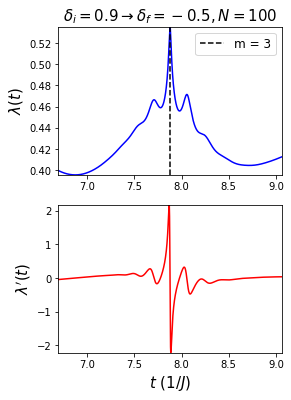

In [ ]:
fig = plt.figure(figsize=(7,5))
delta0 = 0.9
delta1 = - 0.5
J = 1
N = 100
tc = tcritico_LPBC(delta0,delta1,1,3,N)
t = np.linspace(tc*0.85,tc*1.15,2000)

l = Loschmidt_rate_PBC(delta0,delta1,J,N,t)
lprima = Loschmidt_rate_Derivar_PBC(delta0,delta1,J,N,t)

#fig = plt.figure(figsize = (4,6))
#gs = fig.add_gridspec(2, hspace=0.1)
#axs = gs.subplots(sharex=True, sharey=False)
fig, axs = plt.subplots(2, figsize = (4,6))

axs[0].plot(t,l, c = 'blue')
axs[0].set_ylabel(r'$\lambda(t)$',fontsize= 15)
axs[0].set_title(r'$\delta_{i} = 0.9 \rightarrow \delta_{f} = -0.5, N = 100$',fontsize= 15)
axs[0].set_xlim((np.min(t), np.max(t)))
axs[0].set_ylim((np.min(l), np.max(l)))

axs[1].plot(t,lprima, c = 'red')
axs[1].set_ylabel(r'$\lambda^{\prime}(t)$',fontsize= 15)
axs[1].set_xlim((np.min(t), np.max(t)))
axs[1].set_xlabel(r'$t (1/J)$',fontsize= 15)
axs[1].set_ylim(np.min(lprima),np.max(lprima))

axs[0].plot([tc,tc], [np.min(l), np.max(l)], '--', c = "black", label = "m = 3")

axs[0].legend(fontsize= 12, loc='upper right')

plt.savefig('Fisher_3.pdf', dpi=300, bbox_inches='tight')

<Figure size 504x360 with 0 Axes>

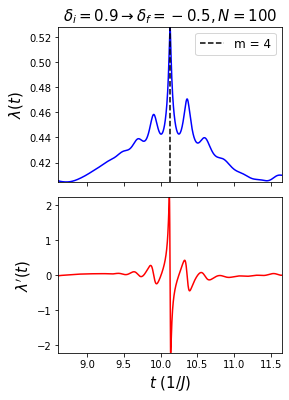

In [ ]:
fig = plt.figure(figsize=(7,5))
delta0 = 0.9
delta1 = - 0.5
J = 1
N = 100
tc = tcritico_LPBC(delta0,delta1,1,4,N)
t = np.linspace(tc*0.85,tc*1.15,2000)

l = Loschmidt_rate_PBC(delta0,delta1,J,N,t)
lprima = Loschmidt_rate_Derivar_PBC(delta0,delta1,J,N,t)

fig = plt.figure(figsize = (4,6))
gs = fig.add_gridspec(2, hspace=0.1)
axs = gs.subplots(sharex=True, sharey=False)
#fig, axs = plt.subplots(2, figsize = (4,6))

axs[0].plot(t,l, c = 'blue')
axs[0].set_ylabel(r'$\lambda(t)$',fontsize= 15)
axs[0].set_title(r'$\delta_{i} = 0.9 \rightarrow \delta_{f} = -0.5, N = 100$',fontsize= 15)
axs[0].set_xlim((np.min(t), np.max(t)))
axs[0].set_ylim((np.min(l), np.max(l)))

axs[1].plot(t,lprima, c = 'red')
axs[1].set_ylabel(r'$\lambda^{\prime}(t)$',fontsize= 15)
axs[1].set_xlim((np.min(t), np.max(t)))
axs[1].set_xlabel(r'$t (1/J)$',fontsize= 15)
axs[1].set_ylim(np.min(lprima),np.max(lprima))

axs[0].plot([tc,tc], [np.min(l), np.max(l)], '--', c = "black", label = "m = 4")

axs[0].legend(fontsize= 12, loc='upper right')

plt.savefig('Fisher_4.pdf', dpi=300, bbox_inches='tight')

In [11]:
def Loschmidt_Amplitud_Trayectory_PBC(delta0,delta1,J,N,t):
    x = np.array([])
    y = np.array([])
    z = np.array([])
    for i in range(len(t)):
        L = L_PBC(delta0, delta1, J, N, t[i])
        x = np.append(x, np.real(L))
        y = np.append(y, np.imag(L))
        z = np.append(z,t[i])
    return x,y,z

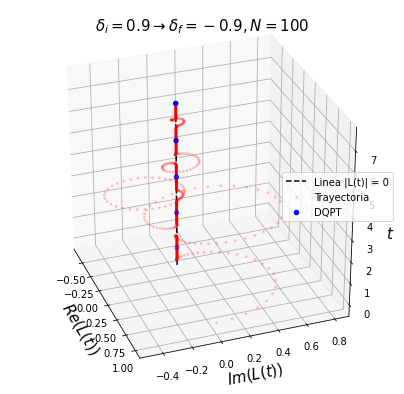

In [6]:
#Trayectoría Total
t = np.linspace(0,tcritico_LPBC(0.9,-0.9,1,4,100),1000)
t_DQPTS = np.array([1,3,5,7,9])*tcritico_LPBC(0.9,-0.9,1,0,100)

L_R, L_I, L_t = Loschmidt_Amplitud_Trayectory_PBC(0.9,-0.9,1,100,t)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(7,7))
ax = plt.axes(projection='3d')

ax.scatter3D(L_R,L_I,L_t,color = 'red', label = "Trayectoria", s = 4, alpha = 0.15)
ax.scatter3D(t_DQPTS*0, t_DQPTS*0, t_DQPTS, c = "blue", zorder = 100, label = "DQPT")

ax.set_xlabel(r'$ Re(L(t)) $', fontsize = 15)
ax.set_ylabel(r'$ Im(L(t)) $', fontsize = 15)
ax.set_zlabel(r'$t$', fontsize = 15)
ax.set_title(r'$\delta_{i} = 0.9 \rightarrow \delta_{f} = -0.9, N = 100$', fontsize = 15)

ax.plot3D([0,0],[0,0],[np.min(t),np.max(t)], '--',color = 'black', label = "Linea |L(t)| = 0")
ax.view_init(30,340)
ax.legend(loc = 'center right')
plt.savefig('Trayectory_PBC_1.pdf', dpi=300, bbox_inches='tight')

In [36]:
def Orden_Magnitud(number):
    return math.floor(math.log(number, 10))

def Zoom_DQPT_PBC(delta0,delta1,J, t, cero_fisher,N, divisor):

    tc = tcritico_LPBC(delta0,delta1,1,cero_fisher,N)
    lmax = Loschmidt_rate_PBC(delta0,delta1,J,N,np.array([tc]))
    dominio = np.linspace(0.9*tc, 1.1*tc, 100)

    fig = plt.figure(figsize = (8,4))
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    ax2 = fig.add_subplot(1, 2, 2)

    #Primero gráfiquemos el eco de Loschmidt 

    l = Loschmidt_rate_PBC(delta0,delta1,J,N,t)
    titulo = r'$\delta_{i} = $' + str(delta0) + r'$ \rightarrow \delta_{f} = $' + str(delta1) +", N = " + str(N)

    ax2.plot(t,l, c = 'black')
    ax2.set_xlabel(r'$t (1/J)$',fontsize= 15)
    ax2.set_ylabel(r'$\lambda(t)$',fontsize= 15)
    ax2.set_title(titulo,fontsize= 15)
    maximo = np.max(l)*1.05
    ax2.set_ylim((0,maximo))

    ax2.scatter(tc,lmax, c = "blue", label = "DQPT", zorder = 20)
    ax2.legend()
    ax2.set_xlim(np.min(t), np.max(t))

    #Ahora hagamos las gráficas de trayectoría

    L_R, L_I, L_t = Loschmidt_Amplitud_Trayectory_PBC(delta0, delta1,J,N,dominio)
    x, y = L_R, L_I
    xmax, ymax, tmax = Loschmidt_Amplitud_Trayectory_PBC(delta0, delta1,J,N,np.array([tc]))

    ax1.scatter3D(x,y, L_t, color = "red", alpha=0.2)
    ax1.scatter3D(xmax, ymax, tmax, color = "blue", label = "DQPT", zorder = 200)
    ax1.set_xlabel(r'$ Re(L(t)) $', fontsize = 12, labelpad=10)
    ax1.set_ylabel(r'$ Im(L(t)) $', fontsize = 12, labelpad=14)
    ax1.set_zlabel(r'$t$', fontsize = 12)
    ax1.plot3D([0,0],[0,0],[np.min(dominio),np.max(dominio)], '--',color = 'black')
    #ax1.legend()

    #ax1.view_init(30,340)

    #Hagamos un primer inset
    axins1 = ax2.inset_axes([1.25, 0, 1,1])
    axins1.scatter(x,y,c="red",s =10)
    x1, x2 = 0.9*tc, 1.1*tc
    y1, y2 = lmax*0.7, lmax
    axins1.set_xlim(x1, x2)
    axins1.set_ylim(y1, y2)
    ax2.indicate_inset_zoom(axins1, edgecolor="black")
    axins1.set_xlim(np.min(x), np.max(x))
    axins1.set_ylim(np.min(y), np.max(y))

    #Pongamos las flechas en el primer inset

    u = np.diff(x)
    v = np.diff(y)
    pos_x = x[:-1] + u/2
    pos_y = y[:-1] + v/2
    norm = np.sqrt(u**2+v**2) 
    axins1.quiver(pos_x, pos_y, u/norm, v/norm, angles="xy", pivot="mid", alpha=0.4)
    axins1.scatter(xmax, ymax, c = "blue", s = 50, label = "DQPT", zorder = 20)
    axins1.set_xlabel(r'Re($L(t)$)',fontsize= 15)
    axins1.set_ylabel(r'Im($L(t)$)',fontsize= 15)
    #axins1.legend()


    #  Hagamos un segundo inset cerca del cero

    axins2 = axins1.inset_axes([1.25, 0, 1,1])
    axins2.scatter(x,y,c="red",s =10)
    axins2.quiver(pos_x, pos_y, u/norm, v/norm, angles="xy", pivot="mid", alpha=0.4)
    axins2.scatter(xmax, ymax, c = "blue", s = 50, label = "DQPT", zorder = 20)
    #axins2.legend()

    ordenx = Orden_Magnitud(np.max(np.abs(x)))
    ordeny = Orden_Magnitud(np.max(np.abs(y)))

    x1, x2 = xmax - (10**ordenx)/divisor, xmax + (10**ordenx)/divisor
    y1, y2 = ymax - (10**ordeny)/divisor, ymax + (10**ordeny)/divisor

    axins2.set_xlim(x1, x2)
    axins2.set_ylim(y1, y2)
    axins2.set_xlabel(r'Re($L(t)$)',fontsize= 15)
    axins2.set_ylabel(r'Im($L(t)$)',fontsize= 15)

    axins1.indicate_inset_zoom(axins2, edgecolor="black")
    

In [37]:
def Zoom_DQPT_PBC(delta0,delta1,J, t, cero_fisher,N, divisor):

    tc = tcritico_LPBC(delta0,delta1,1,cero_fisher,N)
    lmax = Loschmidt_rate_PBC(delta0,delta1,J,N,np.array([tc]))
    dominio = np.linspace(0.9*tc, 1.1*tc, 100)

    fig = plt.figure(figsize = (8,4))
    ax2 = fig.add_subplot(1, 2, 1)

    #Primero gráfiquemos el eco de Loschmidt 

    l = Loschmidt_rate_PBC(delta0,delta1,J,N,t)
    titulo = r'$\delta_{i} = $' + str(delta0) + r'$ \rightarrow \delta_{f} = $' + str(delta1) +", N = " + str(N)

    ax2.plot(t,l, c = 'black')
    ax2.set_xlabel(r'$t (1/J)$',fontsize= 15)
    ax2.set_ylabel(r'$\lambda(t)$',fontsize= 15)
    ax2.set_title(titulo,fontsize= 15)
    maximo = np.max(l)*1.05
    ax2.set_ylim((0,maximo))

    ax2.scatter(tc,lmax, c = "blue", label = "DQPT", zorder = 20)
    ax2.legend()
    ax2.set_xlim(np.min(t), np.max(t))
    
    #Ahora hagamos las gráficas de trayectoría

    L_R, L_I, L_t = Loschmidt_Amplitud_Trayectory_PBC(delta0, delta1,J,N,dominio)
    x, y = L_R, L_I
    xmax, ymax, tmax = Loschmidt_Amplitud_Trayectory_PBC(delta0, delta1,J,N,np.array([tc]))

    #ax1.view_init(30,340)

    #Hagamos un primer inset
    axins1 = ax2.inset_axes([1.25, 0, 1,1])
    axins1.scatter(x,y,c="red",s =10)
    x1, x2 = 0.9*tc, 1.1*tc
    y1, y2 = lmax*0.7, lmax*1.01
    axins1.set_xlim(x1, x2)
    axins1.set_ylim(y1, y2)
    ax2.indicate_inset_zoom(axins1, edgecolor="black")
    axins1.set_xlim(np.min(x), np.max(x))
    axins1.set_ylim(np.min(y), np.max(y))

    #Pongamos las flechas en el primer inset

    u = np.diff(x)
    v = np.diff(y)
    pos_x = x[:-1] + u/2
    pos_y = y[:-1] + v/2
    norm = np.sqrt(u**2+v**2) 
    axins1.quiver(pos_x, pos_y, u/norm, v/norm, angles="xy", pivot="mid", alpha=0.7)
    axins1.scatter(xmax, ymax, c = "blue", s = 50, label = "DQPT", zorder = 20)
    axins1.set_xlabel(r'Re($L(t)$)',fontsize= 15)
    axins1.set_ylabel(r'Im($L(t)$)',fontsize= 15)
    #axins1.legend()


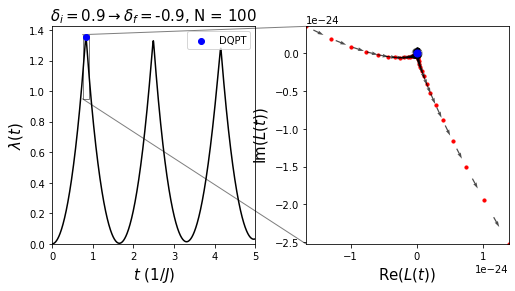

In [38]:
delta0 = 0.9
delta1 = -0.9
J = 1
N = 100
cero_fisher = 0
t = np.linspace(0,5,1000)
divisor = 100
Zoom_DQPT_PBC(delta0,delta1,J, t, cero_fisher, N, divisor)
plt.savefig('Trayectory_PBC_2.pdf', dpi=300, bbox_inches='tight')

In [39]:
def Zoom_DQPT_PBC(delta0,delta1,J, t, cero_fisher,N, divisor):

    tc = tcritico_LPBC(delta0,delta1,1,cero_fisher,N)
    dominio1 = np.linspace(0.9*tc, 1.08*tc, 500)
    l1 = (Loschmidt_rate_PBC(delta0,delta1,J,N,dominio1))
    lmax = np.max(l1)
    
    dominio = np.linspace(0.9*tc, 1.08*tc, 100)

    fig = plt.figure(figsize = (8,4))
    ax2 = fig.add_subplot(1, 2, 1)

    #Primero gráfiquemos el eco de Loschmidt 

    l = Loschmidt_rate_PBC(delta0,delta1,J,N,t)
    titulo = r'$\delta_{i} = $' + str(delta0) + r'$ \rightarrow \delta_{f} = $' + str(delta1) +", N = " + str(N)

    ax2.plot(t,l, c = 'black')
    ax2.plot(dominio1, l1, c = 'black')
    ax2.set_xlabel(r'$t (1/J)$',fontsize= 15)
    ax2.set_ylabel(r'$\lambda(t)$',fontsize= 15)
    maximo = np.max(l)*1.05
    ax2.set_ylim((0,maximo))

    ax2.scatter(tc,lmax, c = "blue", label = "DQPT", zorder = 20)
    ax2.legend()
    ax2.set_xlim(np.min(t), np.max(t))

    #Ahora hagamos las gráficas de trayectoría

    L_R, L_I, L_t = Loschmidt_Amplitud_Trayectory_PBC(delta0, delta1,J,N,dominio)
    x, y = L_R, L_I
    xmax, ymax, tmax = Loschmidt_Amplitud_Trayectory_PBC(delta0, delta1,J,N,np.array([tc]))

    #ax1.view_init(30,340)

    #Hagamos un primer inset
    axins1 = ax2.inset_axes([1.4, 0, 1,1])
    axins1.scatter(x,y,c="red",s =10)
    x1, x2 = 0.9*tc, 1.1*tc
    y1, y2 = lmax*0.7, lmax*1.01
    axins1.set_xlim(x1, x2)
    axins1.set_ylim(y1, y2)
    ax2.indicate_inset_zoom(axins1, edgecolor="black")
    axins1.set_xlim(np.min(x), np.max(x))
    axins1.set_ylim(np.min(y), np.max(y))
    axins1.set_title(titulo,fontsize= 20,pad=20)


    #Pongamos las flechas en el primer inset

    u = np.diff(x)
    v = np.diff(y)
    pos_x = x[:-1] + u/2
    pos_y = y[:-1] + v/2
    norm = np.sqrt(u**2+v**2) 
    axins1.quiver(pos_x, pos_y, u/norm, v/norm, angles="xy", pivot="mid", alpha=0.7)
    axins1.scatter(xmax, ymax, c = "blue", s = 50, label = "DQPT", zorder = 20)
    axins1.set_xlabel(r'Re($L(t)$)',fontsize= 15)
    axins1.set_ylabel(r'Im($L(t)$)',fontsize= 15)
    #axins1.legend()


    #  Hagamos un segundo inset cerca del cero

    axins2 = axins1.inset_axes([1.4, 0, 1,1])
    axins2.scatter(x,y,c="red",s =10)
    axins2.quiver(pos_x, pos_y, u/norm, v/norm, angles="xy", pivot="mid", alpha=0.7)
    axins2.scatter(xmax, ymax, c = "blue", s = 50, label = "DQPT", zorder = 20)
    #axins2.legend()

    ordenx = Orden_Magnitud(np.max(np.abs(x)))
    ordeny = Orden_Magnitud(np.max(np.abs(y)))

    x1, x2 = xmax - (10**ordenx)/divisor, xmax + (10**ordenx)/divisor
    y1, y2 = ymax - (10**ordeny)/divisor, ymax + (10**ordeny)/divisor

    axins2.set_xlim(x1, x2)
    axins2.set_ylim(y1, y2)
    axins2.set_xlabel(r'Re($L(t)$)',fontsize= 15)
    axins2.set_ylabel(r'Im($L(t)$)',fontsize= 15)

    axins1.indicate_inset_zoom(axins2, edgecolor="black")

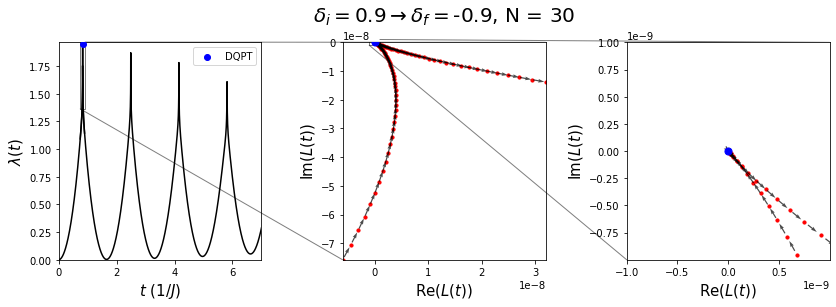

In [40]:
delta0 = 0.9
delta1 = -0.9
J = 1
N = 30
cero_fisher = 0
t = np.linspace(0,7,2500)
divisor = 10
Zoom_DQPT_PBC(delta0,delta1,J, t, cero_fisher, N, divisor)
plt.savefig('Trayectory_PBC_3.pdf', dpi=300, bbox_inches='tight')

In [41]:
def Zoom_DQPT_PBC(delta0,delta1,J, t, cero_fisher,N, divisor):

    tc = tcritico_LPBC(delta0,delta1,1,cero_fisher,N)
    dominio1 = np.linspace(0.9*tc, 1.08*tc, 500)
    l1 = (Loschmidt_rate_PBC(delta0,delta1,J,N,dominio1))
    lmax = np.max(l1)
    
    dominio = np.linspace(0.9*tc, 1.08*tc, 100)

    fig = plt.figure(figsize = (8,4))
    ax2 = fig.add_subplot(1, 2, 1)

    #Primero gráfiquemos el eco de Loschmidt 

    l = Loschmidt_rate_PBC(delta0,delta1,J,N,t)
    titulo = r'$\delta_{i} = $' + str(delta0) + r'$ \rightarrow \delta_{f} = $' + str(delta1) +", N = " + str(N)

    ax2.plot(t,l, c = 'black')
    ax2.plot(dominio1, l1, c = 'black')
    ax2.set_xlabel(r'$t (1/J)$',fontsize= 15)
    ax2.set_ylabel(r'$\lambda(t)$',fontsize= 15)
    maximo = np.max(l)*1.05
    ax2.set_ylim((0,maximo))

    ax2.scatter(tc,lmax, c = "blue", label = "DQPT", zorder = 20)
    ax2.legend()
    ax2.set_xlim(np.min(t), np.max(t))

    #Ahora hagamos las gráficas de trayectoría

    L_R, L_I, L_t = Loschmidt_Amplitud_Trayectory_PBC(delta0, delta1,J,N,dominio)
    x, y = L_R, L_I
    xmax, ymax, tmax = Loschmidt_Amplitud_Trayectory_PBC(delta0, delta1,J,N,np.array([tc]))

    #ax1.view_init(30,340)

    #Hagamos un primer inset
    axins1 = ax2.inset_axes([1.4, 0, 1,1])
    axins1.scatter(x,y,c="red",s =10)
    x1, x2 = 0.9*tc, 1.1*tc
    y1, y2 = lmax*0.7, lmax*1.01
    axins1.set_xlim(x1, x2)
    axins1.set_ylim(y1, y2)
    ax2.indicate_inset_zoom(axins1, edgecolor="black")
    axins1.set_xlim(np.min(x), np.max(x))
    axins1.set_ylim(np.min(y), np.max(y))

    #Pongamos las flechas en el primer inset

    u = np.diff(x)
    v = np.diff(y)
    pos_x = x[:-1] + u/2
    pos_y = y[:-1] + v/2
    norm = np.sqrt(u**2+v**2) 
    axins1.quiver(pos_x, pos_y, u/norm, v/norm, angles="xy", pivot="mid", alpha=0.7)
    axins1.scatter(xmax, ymax, c = "blue", s = 50, label = "DQPT", zorder = 20)
    axins1.set_xlabel(r'Re($L(t)$)',fontsize= 15)
    axins1.set_ylabel(r'Im($L(t)$)',fontsize= 15)
    #axins1.legend()


    #  Hagamos un segundo inset cerca del cero

    axins2 = axins1.inset_axes([1.4, 0, 1,1])
    axins2.scatter(x,y,c="red",s =10)
    axins2.quiver(pos_x, pos_y, u/norm, v/norm, angles="xy", pivot="mid", alpha=0.7)
    axins2.scatter(xmax, ymax, c = "blue", s = 50, label = "DQPT", zorder = 20)
    #axins2.legend()

    ordenx = Orden_Magnitud(np.max(np.abs(x)))
    ordeny = Orden_Magnitud(np.max(np.abs(y)))

    x1, x2 = xmax - (10**ordenx)/divisor, xmax + (10**ordenx)/divisor
    y1, y2 = ymax - (10**ordeny)/divisor, ymax + (10**ordeny)/divisor

    axins2.set_xlim(x1, x2)
    axins2.set_ylim(y1, y2)
    axins2.set_xlabel(r'Re($L(t)$)',fontsize= 15)
    axins2.set_ylabel(r'Im($L(t)$)',fontsize= 15)

    axins1.indicate_inset_zoom(axins2, edgecolor="black")

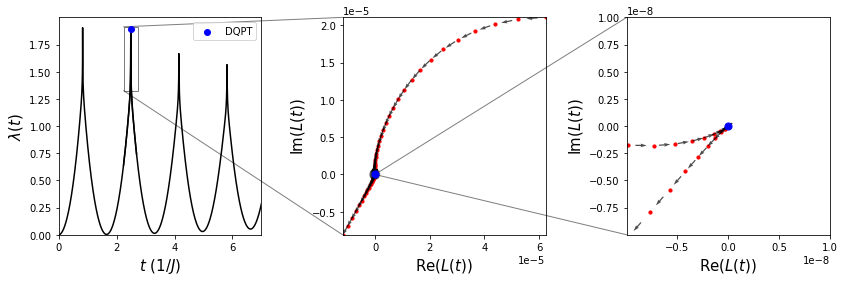

In [42]:
delta0 = 0.9
delta1 = -0.9
J = 1
N = 30
cero_fisher = 1
t = np.linspace(0,7,2000)
divisor = 1000
Zoom_DQPT_PBC(delta0,delta1,J, t, cero_fisher, N, divisor)
plt.savefig('Trayectory_PBC_4.pdf', dpi=300, bbox_inches='tight')

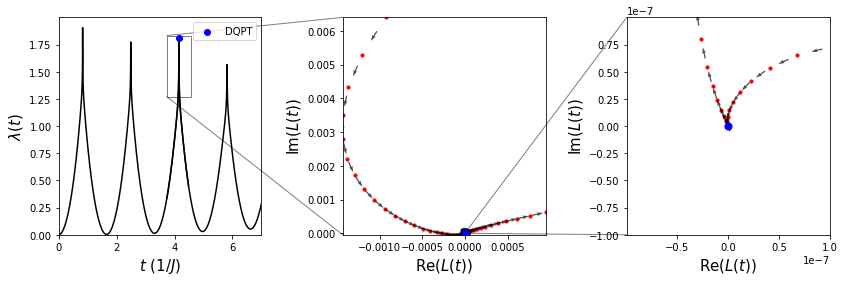

In [43]:
delta0 = 0.9
delta1 = -0.9
J = 1
N = 30
cero_fisher = 2
t = np.linspace(0,7,2000)
divisor = 10000
Zoom_DQPT_PBC(delta0,delta1,J, t, cero_fisher, N, divisor)
plt.savefig('Trayectory_PBC_5.pdf', dpi=300, bbox_inches='tight')

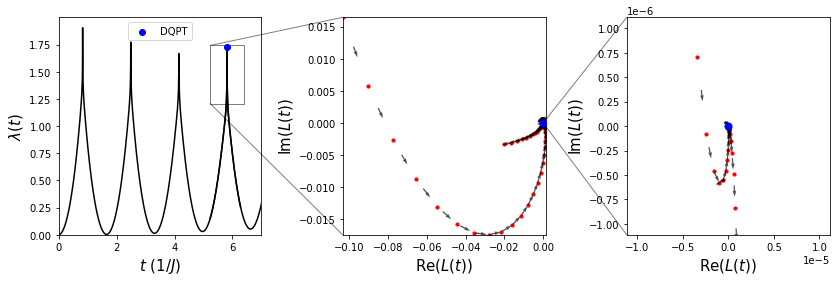

In [44]:
delta0 = 0.9
delta1 = -0.9
J = 1
N = 30
cero_fisher = 3
t = np.linspace(0,7,2000)
divisor = 9000
Zoom_DQPT_PBC(delta0,delta1,J, t, cero_fisher, N, divisor)
plt.savefig('Trayectory_PBC_6.pdf', dpi=300, bbox_inches='tight')

In [45]:
def Zoom_DQPT_PBC(delta0,delta1,J, t, cero_fisher,N, divisor):

    tc = tcritico_LPBC(delta0,delta1,1,cero_fisher,N)
    dominio1 = np.linspace(0.9*tc, 1.08*tc, 500)
    l1 = (Loschmidt_rate_PBC(delta0,delta1,J,N,dominio1))
    lmax = np.max(l1)
    dominio = np.linspace(0.988*tc, 1.01*tc, 100)

    fig = plt.figure(figsize = (8,4))
    ax2 = fig.add_subplot(1, 2, 1)

    #Primero gráfiquemos el eco de Loschmidt 

    l = Loschmidt_rate_PBC(delta0,delta1,J,N,t)
    titulo = r'$\delta_{i} = $' + str(delta0) + r'$ \rightarrow \delta_{f} = $' + str(delta1) +", N = " + str(N)

    ax2.plot(t,l, c = 'black')
    ax2.plot(dominio1, l1, c = 'black')
    ax2.set_xlabel(r'$t (1/J)$',fontsize= 15)
    ax2.set_ylabel(r'$\lambda(t)$',fontsize= 15)
    ax2.set_title(titulo,fontsize= 15)
    maximo = np.max(l)*1.05
    ax2.set_ylim((0,maximo))

    ax2.scatter(tc,lmax, c = "blue", label = "DQPT", zorder = 20)
    ax2.legend()
    ax2.set_xlim(np.min(t), np.max(t))

    #Ahora hagamos las gráficas de trayectoría

    L_R, L_I, L_t = Loschmidt_Amplitud_Trayectory_PBC(delta0, delta1,J,N,dominio)
    x, y = L_R, L_I
    xmax, ymax, tmax = Loschmidt_Amplitud_Trayectory_PBC(delta0, delta1,J,N,np.array([tc]))

    #ax1.view_init(30,340)

    #Hagamos un primer inset
    axins1 = ax2.inset_axes([1.4, 0, 1,1])
    axins1.scatter(x,y,c="red",s =10)
    x1, x2 = 0.985*tc, 1.01*tc
    y1, y2 = lmax*0.7, lmax*1.05
    axins1.set_xlim(x1, x2)
    axins1.set_ylim(y1, y2)
    ax2.indicate_inset_zoom(axins1, edgecolor="black")
    axins1.set_xlim(np.min(x), np.max(x))
    axins1.set_ylim(np.min(y), np.max(y))

    #Pongamos las flechas en el primer inset

    u = np.diff(x)
    v = np.diff(y)
    pos_x = x[:-1] + u/2
    pos_y = y[:-1] + v/2
    norm = np.sqrt(u**2+v**2) 
    axins1.quiver(pos_x, pos_y, u/norm, v/norm, angles="xy", pivot="mid", alpha=0.7)
    axins1.scatter(xmax, ymax, c = "blue", s = 50, label = "DQPT", zorder = 20)
    axins1.set_xlabel(r'Re($L(t)$)',fontsize= 15)
    axins1.set_ylabel(r'Im($L(t)$)',fontsize= 15)
    #axins1.legend()


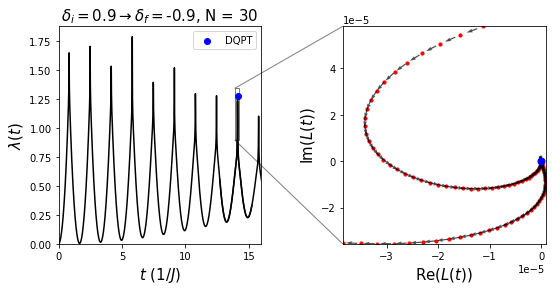

In [46]:
delta0 = 0.9
delta1 = -0.9
J = 1
N = 30
cero_fisher = 8
t = np.linspace(0,16,2000)
divisor = 100
Zoom_DQPT_PBC(delta0,delta1,J, t, cero_fisher, N, divisor)
plt.savefig('Trayectory_PBC_7.pdf', dpi=300, bbox_inches='tight')

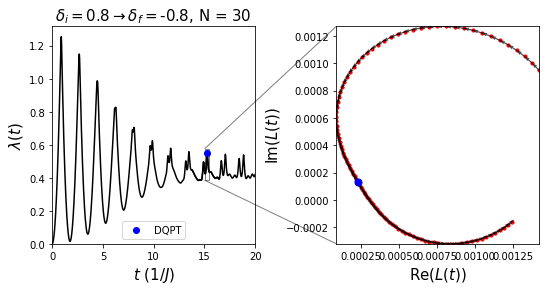

In [47]:
delta0 = 0.8
delta1 = -0.8
J = 1
N = 30
cero_fisher = 8
t = np.linspace(0,20,1000)
divisor = 5
Zoom_DQPT_PBC(delta0,delta1,J, t, cero_fisher, N, divisor)
plt.savefig('Trayectory_PBC_8.pdf', dpi=300, bbox_inches='tight')

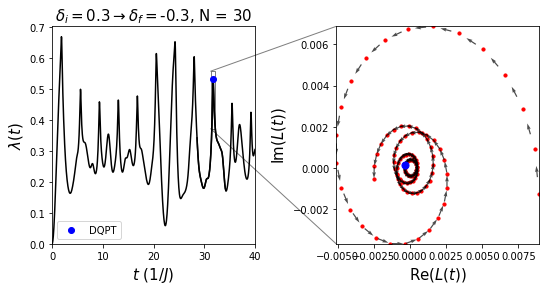

In [48]:
delta0 = 0.3
delta1 = -0.3
J = 1
N = 30
cero_fisher = 8
t = np.linspace(0,40,1000)
divisor = 5
Zoom_DQPT_PBC(delta0,delta1,J, t, cero_fisher, N, divisor)
plt.savefig('Trayectory_PBC_9.pdf', dpi=300, bbox_inches='tight')

### 3.2.1.3 Parámetro de orden dinámico topológico (DTOP)

In [ ]:
def phiG_k(k):
    global delta0, delta1, J, t
    L = L_k(delta0, delta1, J, k, t)
    phi_k = cmath.phase(L)
    return phi_k - eps_k(delta1,J,k)*np.dot(d_unitario(delta0,J,k),d_unitario(delta1,J,k))*t

def DTOP(k):
    return (phiG_k(k + 0.00001) - phiG_k(k))/0.00001

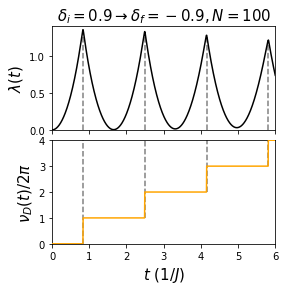

In [ ]:
delta0, delta1 = 0.9, -0.9
J = 1
tiempos = np.linspace(0,6,1000)
nu = np.array([])
for i in range(len(tiempos)):
    t = tiempos[i]
    valor = quad(DTOP, 0, np.pi)[0]
    nu = np.append(nu, valor)
l = Loschmidt_rate_PBC(delta0,delta1,J,100,tiempos)
    
fig = plt.figure(figsize=(4,4))
gs = fig.add_gridspec(2, hspace=0.1)
axs = gs.subplots(sharex=True, sharey=False)

axs[0].plot(tiempos, l, c = "black", zorder = 20)
axs[1].plot(tiempos,nu/(2*np.pi), c = "orange", zorder = 20)

tc = tiempos[np.argmax(l)]
tcs = np.array([0,2,4,6,8])*tc
for i in range(len(tcs)-1):
    ti = np.linspace(tcs[i], tcs[i+1], 200)
    li = Loschmidt_rate_PBC(delta0,delta1,J,100,ti)
    timax = ti[np.argmax(li)]
    axs[0].plot([timax,timax], [0,np.max(li)], '--', c = "gray")
    axs[1].plot([timax,timax], [i,4], '--', c = "gray")
    
    
axs[0].set_ylabel(r'$\lambda(t)$',fontsize= 15)
axs[0].set_title(r'$\delta_{i} = 0.9 \rightarrow \delta_{f} = -0.9, N = 100$',fontsize= 15)
axs[0].set_xlim((0,6))
axs[0].set_ylim((0,1.4))
axs[1].set_ylim((0,4))
axs[1].set_xlabel(r'$t (1/J)$',fontsize= 15)
axs[1].set_ylabel(r'$\nu_{D}(t)/2\pi$',fontsize= 15)
plt.savefig('DTOP_1.pdf', dpi=300, bbox_inches='tight')

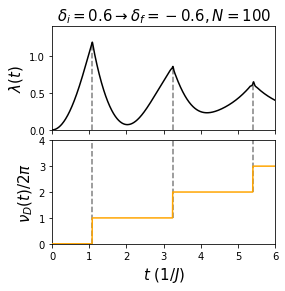

In [ ]:
delta0, delta1 = 0.6, -0.6
J = 1
tiempos = np.linspace(0,6,1000)
nu = np.array([])
for i in range(len(tiempos)):
    t = tiempos[i]
    valor = quad(DTOP, 0, np.pi)[0]
    nu = np.append(nu, valor)
l = Loschmidt_rate_PBC(delta0,delta1,J,100,tiempos)
    
fig = plt.figure(figsize=(4,4))
gs = fig.add_gridspec(2, hspace=0.1)
axs = gs.subplots(sharex=True, sharey=False)

axs[0].plot(tiempos, l, c = "black", zorder = 20)
axs[1].plot(tiempos,nu/(2*np.pi), c = "orange", zorder = 20)

tc = tiempos[np.argmax(l)]
tcs = np.array([0,2,4,6,8])*tc
for i in range(len(tcs)-1):
    ti = np.linspace(tcs[i], tcs[i+1], 200)
    li = Loschmidt_rate_PBC(delta0,delta1,J,100,ti)
    timax = ti[np.argmax(li)]
    axs[0].plot([timax,timax], [0,np.max(li)], '--', c = "gray")
    axs[1].plot([timax,timax], [i,4], '--', c = "gray")
    
    
axs[0].set_ylabel(r'$\lambda(t)$',fontsize= 15)
axs[0].set_title(r'$\delta_{i} = 0.6 \rightarrow \delta_{f} = -0.6, N = 100$',fontsize= 15)
axs[0].set_xlim((0,6))
axs[0].set_ylim((0,1.4))
axs[1].set_ylim((0,4))
axs[1].set_xlabel(r'$t (1/J)$',fontsize= 15)
axs[1].set_ylabel(r'$\nu_{D}(t)/2\pi$',fontsize= 15)
plt.savefig('DTOP_2.pdf', dpi=300, bbox_inches='tight')

# 3.2.2 Condiciones de frontera abiertas (OBC)

In [23]:
def Diag(delta):
    global N
    Matriz = np.zeros((N,N))

    a = 0 #diagonal
    b = 1 + delta #la que aparece despues
    c = 1 - delta #la que aparece primero

    for i in range(N):
        Matriz[i,i] = a
    for i in range(N-1):
        if (i%2 == 0):
            Matriz[i+1,i] = c
            Matriz[i,i+1] = c
        else:
            Matriz[i+1,i] = b
            Matriz[i,i+1] = b

    #Valores, MVectores = np.linalg.eig(Matriz)

    eig_vals, eig_vecs = np.linalg.eig(Matriz)

    eig_vals_sorted = np.sort(eig_vals)
    eig_vecs_sorted = eig_vecs[:, eig_vals.argsort()]
    D = np.identity(N)*eig_vals_sorted
    Q = np.asmatrix(eig_vecs_sorted)

    return D, Q, np.asmatrix(Matriz)

def R(U):
    global N
    indice = int(N/2)
    n = np.zeros((N,N))
    n[0:indice,0:indice] = np.identity(indice)
    return np.dot(U, np.dot(n,np.transpose(U)))

def L_OBC(t, delta0, delta1):
    global N

    H_gorrito_i , U_i, H_i = Diag(delta0)
    H_gorrito_f , U_f, H_f = Diag(delta1)
    
    MatrizR = R(U_i)

    Matriz = np.identity(N) - MatrizR + np.dot(MatrizR, linalg.expm((-1j)*t*H_f))
    #Matriz = np.identity(N) - MatrizR + linalg.expm((1j)*t*H_i) @ np.dot(MatrizR, linalg.expm((-1j)*t*H_f))
    
    return np.linalg.det(Matriz)

def Loschmidt_rate_OBC(delta0,delta1,t):
    l_t = np.array([])
    
    for i in range(len(t)):
        L_t = L_OBC(t[i],delta0, delta1)
        l_t = np.append(l_t,L_t)
    return (-1/N)*np.log(np.abs(l_t)**2)

def Loschmidt_rate_Derivar_OBC(delta0,delta1,t):
    delta = 0.001

    return (Loschmidt_rate_OBC(delta0,delta1,t+delta)-Loschmidt_rate_OBC(delta0,delta1,t))/delta

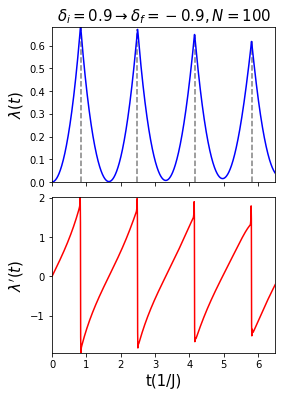

In [ ]:
delta0 = 0.9
delta1 = -0.9
J = 1
N = 100
t = np.linspace(0,6.5,1000)
l = Loschmidt_rate_OBC(delta0,delta1,t)
lprima = Loschmidt_rate_Derivar_OBC(delta0,delta1,t)

fig = plt.figure(figsize = (4,6))
gs = fig.add_gridspec(2, hspace=0.1)
axs = gs.subplots(sharex=True, sharey=False)

tc = t[np.argmax(l)]
tcs = np.array([0,2,4,6,8])*tc
for i in range(len(tcs)-1):
    ti = np.linspace(tcs[i], tcs[i+1], 200)
    li = Loschmidt_rate_OBC(delta0,delta1,ti)
    timax = ti[np.argmax(li)]
    axs[0].plot([timax,timax], [0,np.max(li)], '--', c = "gray")

axs[0].plot(t,l, c = "blue")
axs[1].plot(t,lprima, c = "red")
axs[0].set_ylabel(r'$\lambda (t) $',fontsize= 15)
axs[1].set_ylabel(r'$\lambda^{\prime} (t) $',fontsize= 15)
axs[1].set_xlabel('t(1/J)',fontsize= 15)
axs[0].set_title(r'$\delta_{i} = 0.9 \rightarrow \delta_{f} = -0.9, N = 100$',fontsize= 15)
axs[0].set_ylim(0, np.max(l))
axs[1].set_ylim(np.min(lprima), np.max(lprima))
axs[0].set_xlim(0, np.max(t))
axs[1].set_xlim(0, np.max(t))

plt.savefig('LE_OBC_1.pdf', dpi=600, bbox_inches='tight')

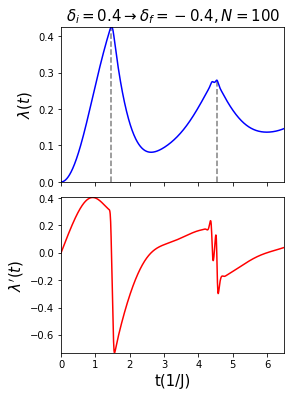

In [ ]:
delta0 = 0.4
delta1 = -0.4
J = 1
N = 100
t = np.linspace(0,6.5,1000)
l = Loschmidt_rate_OBC(delta0,delta1,t)
lprima = Loschmidt_rate_Derivar_OBC(delta0,delta1,t)

fig = plt.figure(figsize = (4,6))
gs = fig.add_gridspec(2, hspace=0.1)
axs = gs.subplots(sharex=True, sharey=False)

tc = t[np.argmax(l)]
tcs = np.array([0,2,4,6,8])*tc
for i in range(len(tcs)-1):
    ti = np.linspace(tcs[i], tcs[i+1], 200)
    li = Loschmidt_rate_OBC(delta0,delta1,ti)
    timax = ti[np.argmax(li)]
    axs[0].plot([timax,timax], [0,np.max(li)], '--', c = "gray")

axs[0].plot(t,l, c = "blue")
axs[1].plot(t,lprima, c = "red")
axs[0].set_ylabel(r'$\lambda (t) $',fontsize= 15)
axs[1].set_ylabel(r'$\lambda^{\prime} (t) $',fontsize= 15)
axs[1].set_xlabel('t(1/J)',fontsize= 15)
axs[0].set_title(r'$\delta_{i} = 0.4 \rightarrow \delta_{f} = -0.4, N = 100$',fontsize= 15)
axs[0].set_ylim(0, np.max(l))
axs[1].set_ylim(np.min(lprima), np.max(lprima))
axs[0].set_xlim(0, np.max(t))
axs[1].set_xlim(0, np.max(t))

plt.savefig('LE_OBC_2.pdf', dpi=600, bbox_inches='tight')

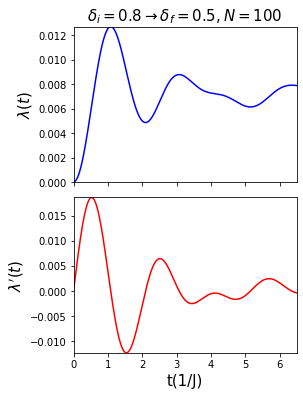

In [ ]:
delta0 = 0.8
delta1 = 0.5
J = 1
N = 100
t = np.linspace(0,6.5,1000)
l = Loschmidt_rate_OBC(delta0,delta1,t)
lprima = Loschmidt_rate_Derivar_OBC(delta0,delta1,t)

fig = plt.figure(figsize = (4,6))
gs = fig.add_gridspec(2, hspace=0.1)
axs = gs.subplots(sharex=True, sharey=False)

axs[0].plot(t,l, c = "blue")
axs[1].plot(t,lprima, c = "red")
axs[0].set_ylabel(r'$\lambda (t) $',fontsize= 15)
axs[1].set_ylabel(r'$\lambda^{\prime} (t) $',fontsize= 15)
axs[1].set_xlabel('t(1/J)',fontsize= 15)
axs[0].set_title(r'$\delta_{i} = 0.8 \rightarrow \delta_{f} = 0.5, N = 100$',fontsize= 15)
axs[0].set_ylim(0, np.max(l))
axs[1].set_ylim(np.min(lprima), np.max(lprima))
axs[0].set_xlim(0, np.max(t))
axs[1].set_xlim(0, np.max(t))

plt.savefig('LE_OBC_3.pdf', dpi=600, bbox_inches='tight')

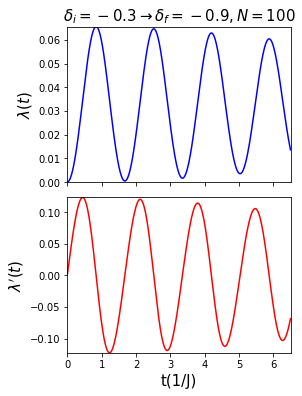

In [ ]:
delta0 = -0.3
delta1 = -0.9
J = 1
N = 100
t = np.linspace(0,6.5,1000)
l = Loschmidt_rate_OBC(delta0,delta1,t)
lprima = Loschmidt_rate_Derivar_OBC(delta0,delta1,t)

fig = plt.figure(figsize = (4,6))
gs = fig.add_gridspec(2, hspace=0.1)
axs = gs.subplots(sharex=True, sharey=False)

axs[0].plot(t,l, c = "blue")
axs[1].plot(t,lprima, c = "red")
axs[0].set_ylabel(r'$\lambda (t) $',fontsize= 15)
axs[1].set_ylabel(r'$\lambda^{\prime} (t) $',fontsize= 15)
axs[1].set_xlabel('t(1/J)',fontsize= 15)
axs[0].set_title(r'$\delta_{i} = -0.3 \rightarrow \delta_{f} = -0.9, N = 100$',fontsize= 15)
axs[0].set_ylim(0, np.max(l))
axs[1].set_ylim(np.min(lprima), np.max(lprima))
axs[0].set_xlim(0, np.max(t))
axs[1].set_xlim(0, np.max(t))

plt.savefig('LE_OBC_4.pdf', dpi=600, bbox_inches='tight')

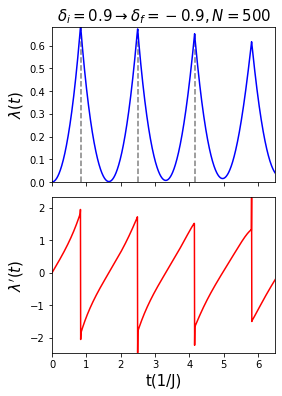

In [ ]:
delta0 = 0.9
delta1 = -0.9
J = 1
N = 500
t = np.linspace(0,6.5,1000)
l = Loschmidt_rate_OBC(delta0,delta1,t)
lprima = Loschmidt_rate_Derivar_OBC(delta0,delta1,t)

fig = plt.figure(figsize = (4,6))
gs = fig.add_gridspec(2, hspace=0.1)
axs = gs.subplots(sharex=True, sharey=False)

tcs = np.array([0,2,4,6,8])
for i in range(len(tcs)-1):
    ti = np.linspace(tcs[i], tcs[i+1], 200)
    li = Loschmidt_rate_OBC(delta0,delta1,ti)
    timax = ti[np.argmax(li)]
    axs[0].plot([timax,timax], [0,np.max(li)], '--', c = "gray")

axs[0].plot(t,l, c = "blue")
axs[1].plot(t,lprima, c = "red")
axs[0].set_ylabel(r'$\lambda (t) $',fontsize= 15)
axs[1].set_ylabel(r'$\lambda^{\prime} (t) $',fontsize= 15)
axs[1].set_xlabel('t(1/J)',fontsize= 15)
axs[0].set_title(r'$\delta_{i} = 0.9 \rightarrow \delta_{f} = -0.9, N = 500$',fontsize= 15)
axs[0].set_ylim(0, np.max(l))
axs[1].set_ylim(np.min(lprima), np.max(lprima))
axs[0].set_xlim(0, np.max(t))
axs[1].set_xlim(0, np.max(t))

plt.savefig('LE_OBC_5.pdf', dpi=600, bbox_inches='tight')

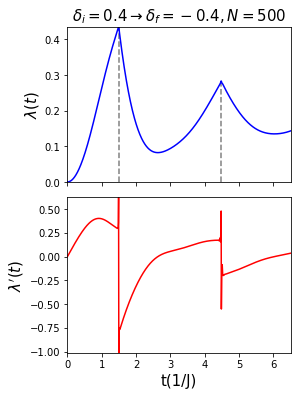

In [ ]:
delta0 = 0.4
delta1 = -0.4
J = 1
N = 500
t = np.linspace(0,6.5,1000)
l = Loschmidt_rate_OBC(delta0,delta1,t)
lprima = Loschmidt_rate_Derivar_OBC(delta0,delta1,t)

fig = plt.figure(figsize = (4,6))
gs = fig.add_gridspec(2, hspace=0.1)
axs = gs.subplots(sharex=True, sharey=False)

tc = t[np.argmax(l)]
tcs = np.array([0,2,4,6,8])*tc
for i in range(len(tcs)-1):
    ti = np.linspace(tcs[i], tcs[i+1], 200)
    li = Loschmidt_rate_OBC(delta0,delta1,ti)
    timax = ti[np.argmax(li)]
    axs[0].plot([timax,timax], [0,np.max(li)], '--', c = "gray")

axs[0].plot(t,l, c = "blue")
axs[1].plot(t,lprima, c = "red")
axs[0].set_ylabel(r'$\lambda (t) $',fontsize= 15)
axs[1].set_ylabel(r'$\lambda^{\prime} (t) $',fontsize= 15)
axs[1].set_xlabel('t(1/J)',fontsize= 15)
axs[0].set_title(r'$\delta_{i} = 0.4 \rightarrow \delta_{f} = -0.4, N = 500$',fontsize= 15)
axs[0].set_ylim(0, np.max(l))
axs[1].set_ylim(np.min(lprima), np.max(lprima))
axs[0].set_xlim(0, np.max(t))
axs[1].set_xlim(0, np.max(t))

plt.savefig('LE_OBC_6.pdf', dpi=600, bbox_inches='tight')

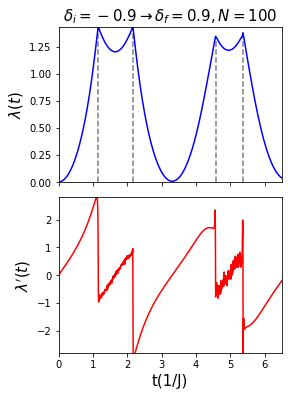

In [ ]:
delta0 = -0.9
delta1 = 0.9
J = 1
N = 100
t = np.linspace(0,6.5,1000)
l = Loschmidt_rate_OBC(delta0,delta1,t)
lprima = Loschmidt_rate_Derivar_OBC(delta0,delta1,t)

fig = plt.figure(figsize = (4,6))
gs = fig.add_gridspec(2, hspace=0.1)
axs = gs.subplots(sharex=True, sharey=False)

tcs = np.array([0,1.7,4,5,6])
for i in range(len(tcs)-1):
    ti = np.linspace(tcs[i], tcs[i+1], 200)
    li = Loschmidt_rate_OBC(delta0,delta1,ti)
    timax = ti[np.argmax(li)]
    axs[0].plot([timax,timax], [0,np.max(li)], '--', c = "gray")

axs[0].plot(t,l, c = "blue")
axs[1].plot(t,lprima, c = "red")
axs[0].set_ylabel(r'$\lambda (t) $',fontsize= 15)
axs[1].set_ylabel(r'$\lambda^{\prime} (t) $',fontsize= 15)
axs[1].set_xlabel('t(1/J)',fontsize= 15)
axs[0].set_title(r'$\delta_{i} = -0.9 \rightarrow \delta_{f} = 0.9, N = 100$',fontsize= 15)
axs[0].set_ylim(0, np.max(l))
axs[1].set_ylim(-2.8,2.8)
axs[0].set_xlim(0, np.max(t))
axs[1].set_xlim(0, np.max(t))

plt.savefig('LE_OBC_7.pdf', dpi=600, bbox_inches='tight')

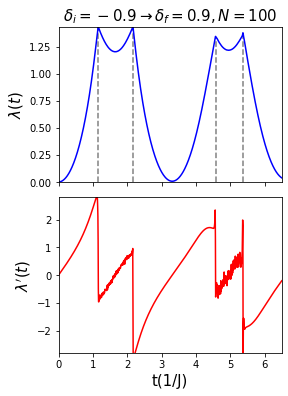

In [ ]:
fig = plt.figure(figsize = (4,6))
gs = fig.add_gridspec(2, hspace=0.1)
axs = gs.subplots(sharex=True, sharey=False)

tcs = np.array([0,1.7,4,5,6])
for i in range(len(tcs)-1):
    ti = np.linspace(tcs[i], tcs[i+1], 100)
    li = Loschmidt_rate_OBC(delta0,delta1,ti)
    timax = ti[np.argmax(li)]
    axs[0].plot([timax,timax], [0,np.max(li)], '--', c = "gray")

axs[0].plot(t,l, c = "blue")
axs[1].plot(t,lprima, c = "red")
axs[0].set_ylabel(r'$\lambda (t) $',fontsize= 15)
axs[1].set_ylabel(r'$\lambda^{\prime} (t) $',fontsize= 15)
axs[1].set_xlabel('t(1/J)',fontsize= 15)
axs[0].set_title(r'$\delta_{i} = -0.9 \rightarrow \delta_{f} = 0.9, N = 100$',fontsize= 15)
axs[0].set_ylim(0, np.max(l))
axs[1].set_ylim(-2.8,2.8)
axs[0].set_xlim(0, np.max(t))
axs[1].set_xlim(0, np.max(t))

plt.savefig('LE_OBC_7.pdf', dpi=600, bbox_inches='tight')

In [24]:
# para poder cuadrar los ejes y comparar con la tesis usemos esto

def t_critico_iguales(delta): #Funciona bien cuando va de -delta a delta.
    return np.pi*np.sqrt(1+delta**2)/(4*np.sqrt(2)*delta)

In [ ]:
# Ahora se pueden repetir algunas gráficas para OBC

J = 1
N = 100
cantidad = 300
t = np.linspace(0,10,cantidad)
deltas0 = np.linspace(0,1,cantidad)
deltas1 = deltas0*-1

Matriz = np.zeros((cantidad,cantidad))

for i in range(len(deltas0)):
    Matriz[i,0:cantidad] = Loschmidt_rate_OBC(deltas0[i],deltas1[i],t)

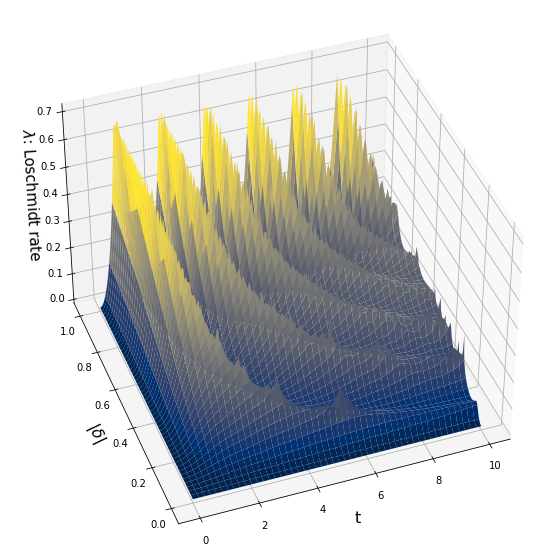

In [ ]:
t = np.linspace(0,10,cantidad)
deltas0 = np.linspace(0,1,cantidad)
t, deltas0 = np.meshgrid(t, deltas0)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(10,10))
surf1 = ax.plot_surface(t, deltas0, Matriz,cmap=plt.cm.cividis)
ax.view_init(40,-110)
ax.grid()
ax.set_xlabel('t', fontsize= 16)
ax.set_ylabel(r'$ |\delta| $', fontsize= 16)
ax.set_zlabel(r'$\lambda$' + ': Loschmidt rate', fontsize= 15)
plt.savefig('LE_OBC_3D_1.pdf', dpi=300, bbox_inches='tight')

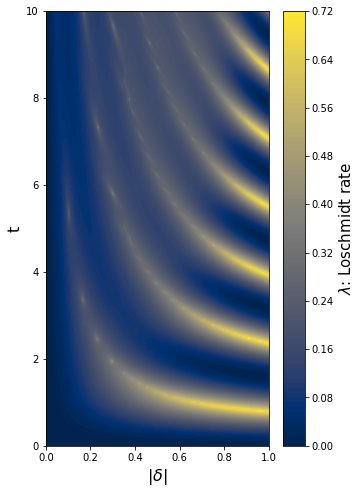

In [ ]:
fig = plt.figure(figsize=(5,8))

plt.contourf(deltas0, t, Matriz,100, cmap=plt.cm.cividis)
plt.ylabel('t', fontsize= 16)
plt.xlabel(r'$ |\delta| $', fontsize= 16)
cbar = plt.colorbar()
cbar.set_label(r'$\lambda$' + ': Loschmidt rate', fontsize= 15)
plt.savefig('LE_OBC_3D_2.pdf', dpi=600, bbox_inches='tight')

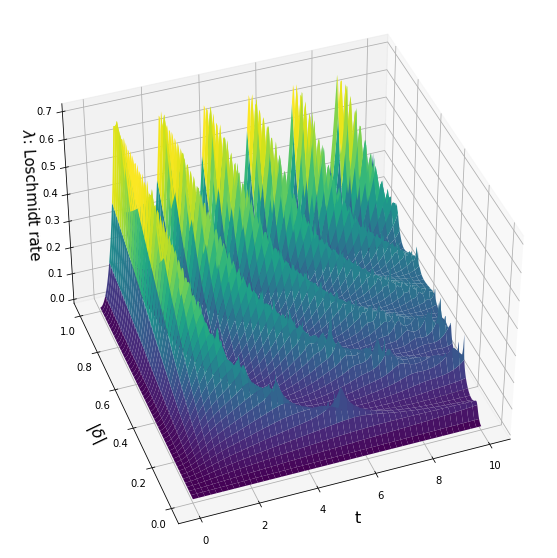

In [ ]:
t = np.linspace(0,10,cantidad)
deltas0 = np.linspace(0,1,cantidad)
t, deltas0 = np.meshgrid(t, deltas0)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(10,10))
surf1 = ax.plot_surface(t, deltas0, Matriz,cmap=plt.cm.viridis)
ax.view_init(40,-110)
ax.grid()
ax.set_xlabel('t', fontsize= 16)
ax.set_ylabel(r'$ |\delta| $', fontsize= 16)
ax.set_zlabel(r'$\lambda$' + ': Loschmidt rate', fontsize= 15)
plt.savefig('LE_OBC_3D_3.pdf', dpi=300, bbox_inches='tight')

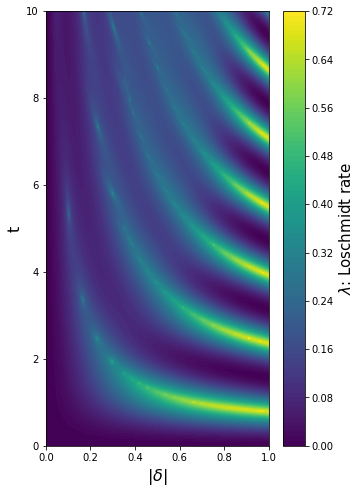

In [ ]:
fig = plt.figure(figsize=(5,8))

plt.contourf(deltas0, t, Matriz,100, cmap=plt.cm.viridis)
plt.ylabel('t', fontsize= 16)
plt.xlabel(r'$ |\delta| $', fontsize= 16)
cbar = plt.colorbar()
cbar.set_label(r'$\lambda$' + ': Loschmidt rate', fontsize= 15)
plt.savefig('LE_OBC_3D_4.pdf', dpi=600, bbox_inches='tight')

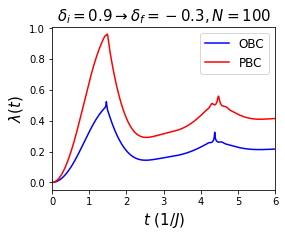

In [49]:
fig = plt.figure(figsize=(4,3))
delta0 = 0.9
delta1 = -0.3
J = 1
N = 100
t = np.linspace(0,6,1000)

l_OBC = Loschmidt_rate_OBC(delta0,delta1,t)
plt.plot(t,l_OBC, c = 'blue', label = 'OBC', )

l_PBC = Loschmidt_rate_PBC(delta0,delta1,J,N,t)
plt.plot(t,l_PBC, c = 'red', label = 'PBC')

plt.legend(loc = 'upper right', prop={'size': 12})
plt.xlabel(r'$t (1/J)$',fontsize= 15)
plt.ylabel(r'$\lambda(t)$',fontsize= 15)
plt.title(r'$\delta_{i} = 0.9 \rightarrow \delta_{f} = -0.3, N = 100$',fontsize= 15)
plt.xlim((0,6))
plt.savefig('LE_PBC_VS_OBC_1.pdf', dpi=600, bbox_inches='tight')

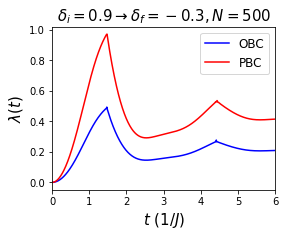

In [ ]:
fig = plt.figure(figsize=(4,3))
delta0 = 0.9
delta1 = -0.3
J = 1
N = 500
t = np.linspace(0,6,1000)

l_OBC = Loschmidt_rate_OBC(delta0,delta1,t)
plt.plot(t,l_OBC, c = 'blue', label = 'OBC', )

l_PBC = Loschmidt_rate_PBC(delta0,delta1,J,N,t)
plt.plot(t,l_PBC, c = 'red', label = 'PBC')

plt.legend(loc = 'upper right', prop={'size': 12})
plt.xlabel(r'$t (1/J)$',fontsize= 15)
plt.ylabel(r'$\lambda(t)$',fontsize= 15)
plt.title(r'$\delta_{i} = 0.9 \rightarrow \delta_{f} = -0.3, N = 500$',fontsize= 15)
plt.xlim((0,6))
plt.savefig('LE_PBC_VS_OBC_2.pdf', dpi=600, bbox_inches='tight')

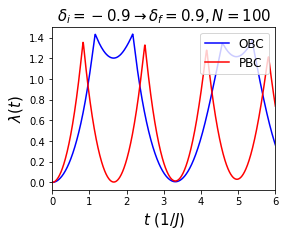

In [50]:
fig = plt.figure(figsize=(4,3))
delta0 = -0.9
delta1 = 0.9
J = 1
N = 100
t = np.linspace(0,6,1000)

l_OBC = Loschmidt_rate_OBC(delta0,delta1,t)
plt.plot(t,l_OBC, c = 'blue', label = 'OBC', )

l_PBC = Loschmidt_rate_PBC(delta0,delta1,J,N,t)
plt.plot(t,l_PBC, c = 'red', label = 'PBC')

plt.legend(loc = 'upper right', prop={'size': 12})
plt.xlabel(r'$t (1/J)$',fontsize= 15)
plt.ylabel(r'$\lambda(t)$',fontsize= 15)
plt.title(r'$\delta_{i} = -0.9 \rightarrow \delta_{f} = 0.9, N = 100$',fontsize= 15)
plt.xlim((0,6))
plt.savefig('LE_PBC_VS_OBC_3.pdf', dpi=600, bbox_inches='tight')

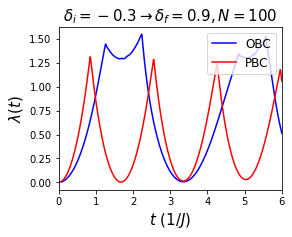

In [ ]:
fig = plt.figure(figsize=(4,3))
delta0 = -0.3
delta1 = 0.9
J = 1
N = 100
t = np.linspace(0,6,1000)

l_OBC = Loschmidt_rate_OBC(delta0,delta1,t)
plt.plot(t,l_OBC, c = 'blue', label = 'OBC', )

l_PBC = Loschmidt_rate_PBC(delta0,delta1,J,N,t)
plt.plot(t,l_PBC, c = 'red', label = 'PBC')

plt.legend(loc = 'upper right', prop={'size': 12})
plt.xlabel(r'$t (1/J)$',fontsize= 15)
plt.ylabel(r'$\lambda(t)$',fontsize= 15)
plt.title(r'$\delta_{i} = -0.3 \rightarrow \delta_{f} = 0.9, N = 100$',fontsize= 15)
plt.xlim((0,6))
plt.savefig('LE_PBC_VS_OBC_4.pdf', dpi=600, bbox_inches='tight')

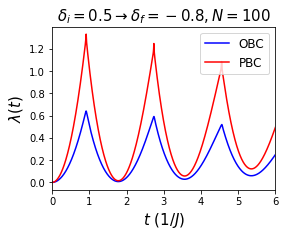

In [ ]:
fig = plt.figure(figsize=(4,3))
delta0 = 0.5
delta1 = -0.8
J = 1
N = 100
t = np.linspace(0,6,1000)

l_OBC = Loschmidt_rate_OBC(delta0,delta1,t)
plt.plot(t,l_OBC, c = 'blue', label = 'OBC', )

l_PBC = Loschmidt_rate_PBC(delta0,delta1,J,N,t)
plt.plot(t,l_PBC, c = 'red', label = 'PBC')

plt.legend(loc = 'upper right', prop={'size': 12})
plt.xlabel(r'$t (1/J)$',fontsize= 15)
plt.ylabel(r'$\lambda(t)$',fontsize= 15)
plt.title(r'$\delta_{i} = 0.5 \rightarrow \delta_{f} = -0.8, N = 100$',fontsize= 15)
plt.xlim((0,6))
plt.savefig('LE_PBC_VS_OBC_5.pdf', dpi=600, bbox_inches='tight')

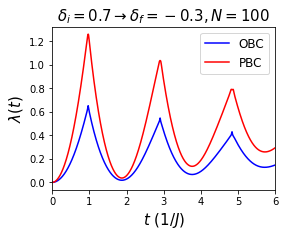

In [ ]:
fig = plt.figure(figsize=(4,3))
delta0 = 0.7
delta1 = -0.7
J = 1
N = 100
t = np.linspace(0,6,1000)

l_OBC = Loschmidt_rate_OBC(delta0,delta1,t)
plt.plot(t,l_OBC, c = 'blue', label = 'OBC', )

l_PBC = Loschmidt_rate_PBC(delta0,delta1,J,N,t)
plt.plot(t,l_PBC, c = 'red', label = 'PBC')

plt.legend(loc = 'upper right', prop={'size': 12})
plt.xlabel(r'$t (1/J)$',fontsize= 15)
plt.ylabel(r'$\lambda(t)$',fontsize= 15)
plt.title(r'$\delta_{i} = 0.7 \rightarrow \delta_{f} = -0.3, N = 100$',fontsize= 15)
plt.xlim((0,6))
plt.savefig('LE_PBC_VS_OBC_6.pdf', dpi=600, bbox_inches='tight')

In [ ]:
# Ahora grafiquemos las trayectorias

def Loschmidt_Amplitud_Trayectory_OBC(delta0,delta1,N1,t):
    global N
    N = N1
    
    x = np.array([])
    y = np.array([])
    z = np.array([])
    for i in range(len(t)):
        L = L_OBC(delta0, delta1, t[i])
        x = np.append(x, np.real(L))
        y = np.append(y, np.imag(L))
        z = np.append(z,t[i])
    return x,y,z

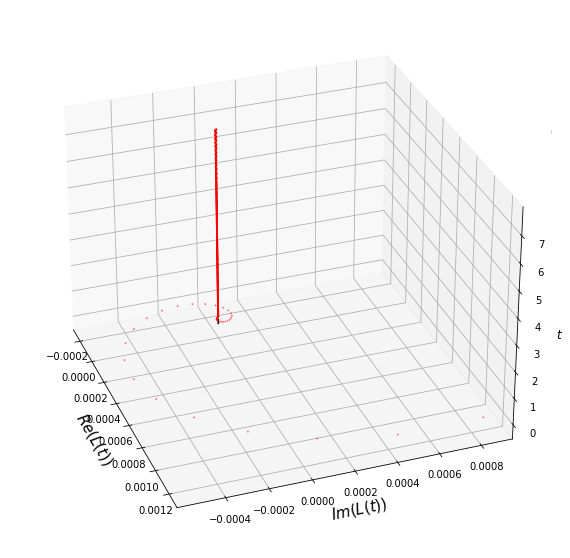

In [ ]:
t = np.linspace(0,tcritico_LPBC(0.9,-0.9,1,4,100),1000)

L_R, L_I, L_t = Loschmidt_Amplitud_Trayectory_OBC(0.9,-0.9,100,t)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(10,10))
ax = plt.axes(projection='3d')

ax.scatter3D(L_R,L_I,L_t,color = 'red', label = "Trayectoría", s = 1, alpha = 0.4)

ax.set_xlabel(r'$ Re(L(t)) $', fontsize = 15)
ax.set_ylabel(r'$ Im(L(t)) $', fontsize = 15)
ax.set_zlabel(r'$t$', fontsize = 12)

ax.plot3D([0,0],[0,0],[np.min(t),np.max(t)], '--',color = 'black', label = "Origen")
ax.view_init(30,340)

In [ ]:
def Orden_Magnitud(number):
    return math.floor(math.log(number, 10))

def Zoom_DQPT_OBC(delta0,delta1, t, cero_fisher, divisor):
    global N
    fig = plt.figure(figsize = (12,6))
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    ax2 = fig.add_subplot(1, 2, 2)

    #Primero gráfiquemos el eco de Loschmidt 

    l = Loschmidt_rate_OBC(delta0,delta1,t)

    tc = tcritico_LPBC(delta0,delta1,1,cero_fisher,N)
    lmax = Loschmidt_rate_OBC(delta0,delta1,np.array([tc]))
    dominio = np.array([])

    for i in range(len(t)):
        if t[i] >= 0.9*tc and t[i] <= 1.1*tc :
            dominio = np.append(dominio, t[i])

    l2 = Loschmidt_rate_OBC(delta0,delta1,dominio)   
    tc = dominio[np.argmax(l2)]
    lmax = np.max(l2)
    #dominio = np.linspace(0.9*tc, 1.1*tc, 80)

    titulo = r'$\delta_{i} = $' + str(delta0) + r'$ \rightarrow \delta_{f} = $' + str(delta1) +", N = " + str(N)

    ax2.plot(t,l, c = 'black')
    ax2.set_xlabel(r'$t (1/J)$',fontsize= 15)
    ax2.set_ylabel(r'$\lambda(t): Loschmidt Rate$',fontsize= 15)
    ax2.set_title(titulo,fontsize= 15)
    maximo = lmax*1.05
    ax2.set_ylim((0,np.max(l)*1.05))

    ax2.scatter(tc,lmax, c = "blue", label = "DQPT", zorder = 20)
    ax2.legend()

    #Ahora hagamos las gráficas de trayectoría

    L_R, L_I, L_t = Loschmidt_Amplitud_Trayectory_OBC(delta0, delta1,N,dominio)
    x, y = L_R, L_I
    xmax, ymax, tmax = Loschmidt_Amplitud_Trayectory_OBC(delta0, delta1,N,np.array([tc]))

    ax1.scatter3D(x,y, L_t, color = "red", alpha=0.2)
    ax1.scatter3D(xmax, ymax, tmax, color = "blue", label = "DQPT", zorder = 200)
    ax1.set_xlabel(r'$ Re(L(t)) $', fontsize = 12, labelpad=10)
    ax1.set_ylabel(r'$ Im(L(t)) $', fontsize = 12, labelpad=14)
    ax1.set_zlabel(r'$t$', fontsize = 12)
    ax1.plot3D([0,0],[0,0],[np.min(dominio),np.max(dominio)], '--',color = 'black')
    #ax1.legend()

    #ax1.view_init(30,340)

    #Hagamos un primer inset
    axins1 = ax2.inset_axes([1.3, 0, 1,1])
    axins1.scatter(x,y,c="red",s =10)
    x1, x2 = 0.9*tc, 1.1*tc
    y1, y2 = maximo*0.7, maximo
    axins1.set_xlim(x1, x2)
    axins1.set_ylim(y1, y2)
    ax2.indicate_inset_zoom(axins1, edgecolor="black")
    axins1.set_xlim(np.min(x), np.max(x))
    axins1.set_ylim(np.min(y), np.max(y))

    #Pongamos las flechas en el primer inset

    u = np.diff(x)
    v = np.diff(y)
    pos_x = x[:-1] + u/2
    pos_y = y[:-1] + v/2
    norm = np.sqrt(u**2+v**2) 
    axins1.quiver(pos_x, pos_y, u/norm, v/norm, angles="xy", pivot="mid", alpha=0.7)
    axins1.scatter(xmax, ymax, c = "blue", s = 50, label = "DQPT", zorder = 20)
    axins1.set_title("Loschmidt Amplitude",fontsize= 15)
    axins1.set_xlabel(r'Re($L(t)$)',fontsize= 15)
    axins1.set_ylabel(r'Im($L(t)$)',fontsize= 15)
    #axins1.legend()

    #  Hagamos un segundo inset cerca del cero

    axins2 = axins1.inset_axes([1.3, 0, 1,1])
    axins2.scatter(x,y,c="red",s =10)
    axins2.quiver(pos_x, pos_y, u/norm, v/norm, angles="xy", pivot="mid", alpha=0.7)
    axins2.scatter(xmax, ymax, c = "blue", s = 50, label = "DQPT", zorder = 20)
    #axins2.legend()

    ordenx = Orden_Magnitud(np.max(np.abs(x)))
    ordeny = Orden_Magnitud(np.max(np.abs(y)))

    x1, x2 = xmax - (10**ordenx)/divisor, xmax + (10**ordenx)/divisor
    y1, y2 = ymax - (10**ordeny)/divisor, ymax + (10**ordeny)/divisor

    axins2.set_xlim(x1, x2)
    axins2.set_ylim(y1, y2)
    axins2.set_xlabel(r'Re($L(t)$)',fontsize= 15)
    axins2.set_ylabel(r'Im($L(t)$)',fontsize= 15)

    axins1.indicate_inset_zoom(axins2, edgecolor="black")

    plt.show()

In [ ]:
def Orden_Magnitud(number):
    return math.floor(math.log(number, 10))

def Zoom_DQPT_OBC(delta0,delta1, t, cero_fisher, divisor):
    global N
    fig = plt.figure(figsize = (8,4))
    #ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    ax2 = fig.add_subplot(1, 2, 1)

    #Primero gráfiquemos el eco de Loschmidt 

    l = Loschmidt_rate_OBC(delta0,delta1,t)

    tc = tcritico_LPBC(delta0,delta1,1,cero_fisher,N)
    lmax = Loschmidt_rate_OBC(delta0,delta1,np.array([tc]))
    dominio = np.array([])
    
    for i in range(len(t)):
        if t[i] >= 0.95*tc and t[i] <= 1.1*tc :
            dominio = np.append(dominio, t[i])

    l2 = Loschmidt_rate_OBC(delta0,delta1,dominio)   
    tc = dominio[np.argmax(l2)]
    lmax = np.max(l2)
    dominio = np.linspace(0.98*tc, 1.05*tc, 40)

    titulo = r'$\delta_{i} = $' + str(delta0) + r'$ \rightarrow \delta_{f} = $' + str(delta1) +", N = " + str(N)

    ax2.plot(t,l, c = 'black')
    ax2.set_xlabel(r'$t (1/J)$',fontsize= 15)
    ax2.set_ylabel(r'$\lambda(t)$',fontsize= 15)
    ax2.set_title(titulo,fontsize= 15)
    maximo = lmax*1.05
    ax2.set_ylim((0,np.max(l)*1.05))

    ax2.scatter(tc,lmax, c = "blue", label = "DQPT", zorder = 20)
    ax2.legend()
    ax2.set_xlim(np.min(t), np.max(t))

    #Ahora hagamos las gráficas de trayectoría

    L_R, L_I, L_t = Loschmidt_Amplitud_Trayectory_OBC(delta0, delta1,N,dominio)
    x, y = L_R, L_I
    xmax, ymax, tmax = Loschmidt_Amplitud_Trayectory_OBC(delta0, delta1,N,np.array([tc]))

    #Hagamos un primer inset
    axins1 = ax2.inset_axes([1.45, 0, 1,1])
    axins1.scatter(x,y,c="red",s =10)
    x1, x2 = 0.9*tc, 1.1*tc
    y1, y2 = maximo*0.7, maximo
    axins1.set_xlim(x1, x2)
    axins1.set_ylim(y1, y2)
    ax2.indicate_inset_zoom(axins1, edgecolor="black")
    axins1.set_xlim(np.min(x), np.max(x))
    axins1.set_ylim(np.min(y), np.max(y))

    #Pongamos las flechas en el primer inset

    u = np.diff(x)
    v = np.diff(y)
    pos_x = x[:-1] + u/2
    pos_y = y[:-1] + v/2
    norm = np.sqrt(u**2+v**2) 
    axins1.quiver(pos_x, pos_y, u/norm, v/norm, angles="xy", pivot="mid", alpha=0.7)
    axins1.scatter(xmax, ymax, c = "blue", s = 50, label = "DQPT", zorder = 20)
    axins1.set_xlabel(r'Re($L(t)$)',fontsize= 15)
    axins1.set_ylabel(r'Im($L(t)$)',fontsize= 15)
    #axins1.legend()

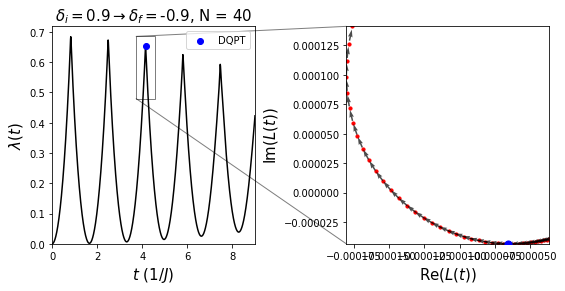

In [ ]:
delta0 = 0.9
delta1 = -0.9
J = 1
N = 40
cero_fisher = 2
t = np.linspace(0,9,1000)
divisor = 3
Zoom_DQPT_OBC(delta0,delta1, t, cero_fisher, divisor)
plt.savefig('Trayectory_OBC_1.pdf', dpi=300, bbox_inches='tight')

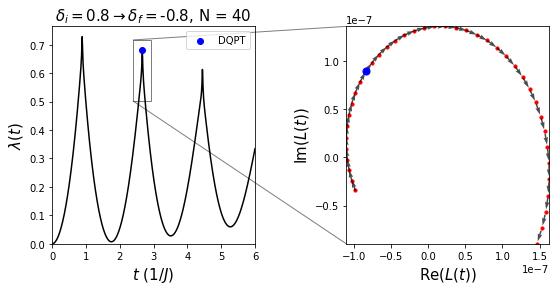

In [ ]:
delta0 = 0.8
delta1 = -0.8
J = 1
N = 40
cero_fisher = 1
t = np.linspace(0,6,1000)
divisor = 2
Zoom_DQPT_OBC(delta0,delta1, t, cero_fisher, divisor)
plt.savefig('Trayectory_OBC_2.pdf', dpi=300, bbox_inches='tight')

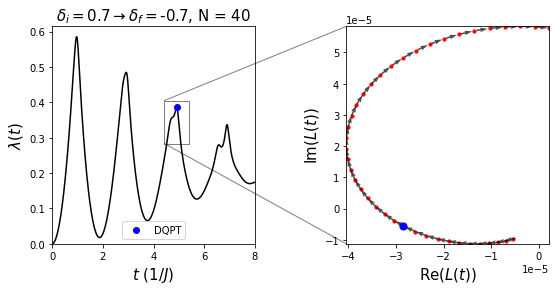

In [ ]:
delta0 = 0.7
delta1 = -0.7
J = 1
N = 40
cero_fisher = 2
t = np.linspace(0,8,1500)
divisor = 2
Zoom_DQPT_OBC(delta0,delta1, t, cero_fisher, divisor)
plt.savefig('Trayectory_OBC_3.pdf', dpi=300, bbox_inches='tight')

In [ ]:
### Intentemos primero corregir lo de la fase en la expresión del Eco de Loschmidt a ver si las trayetorías locales cambian

def L_OBC(t, delta0, delta1):
    global N

    H_gorrito_i , U_i, H_i = Diag(delta0)
    H_gorrito_f , U_f, H_f = Diag(delta1)
    
    MatrizR = R(U_i)
    #El cambio sería que aquí aparecería otro temrino en la exponencial
    Matriz = np.identity(N) - MatrizR + MatrizR @ linalg.expm((1j)*t*H_i)  @linalg.expm((-1j)*t*H_f) 
    
    return np.linalg.det(Matriz)

(0.0, 6.0)

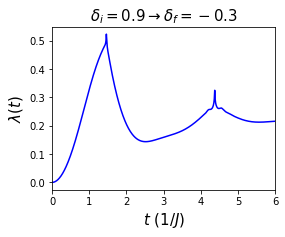

In [ ]:
fig = plt.figure(figsize=(4,3))
delta0 = 0.9
delta1 = -0.3
J = 1
N = 100
t = np.linspace(0,6,1000)

l = Loschmidt_rate_OBC(delta0,delta1,t)
plt.plot(t,l, c = 'blue', label = r'$\lambda$' + ': Loschmidt rate')


plt.xlabel(r'$t (1/J)$',fontsize= 15)
plt.ylabel(r'$\lambda(t)$',fontsize= 15)
plt.title(r'$\delta_{i} = 0.9 \rightarrow \delta_{f} = -0.3$',fontsize= 15)
plt.xlim((0,6))
#plt.grid()

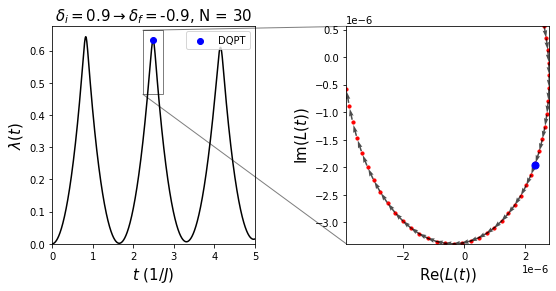

In [ ]:
delta0 = 0.9
delta1 = -0.9
J = 1
N = 30
cero_fisher = 1
t = np.linspace(0,5,1000)
divisor = 3
Zoom_DQPT_OBC(delta0,delta1, t, cero_fisher, divisor)

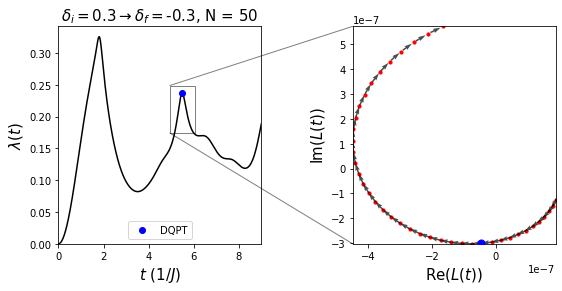

In [ ]:
delta0 = 0.3
delta1 = -0.3
J = 1
N = 50
cero_fisher = 1
t = np.linspace(0,9,1000)
divisor = 3
Zoom_DQPT_OBC(delta0,delta1, t, cero_fisher, divisor)

### 3.3 Correspondencia interior-frontera

In [ ]:
#Igual sigue sin haber algo interesante que observar.

#Ahora intentemos simular los valores propios de la Matriz de Loschmidt

def Loschmidt_Matrix_OBC(t, delta0, delta1):
    global N

    H_gorrito_i , U_i, H_i = Diag(delta0)
    H_gorrito_f , U_f, H_f = Diag(delta1)
    
    MatrizR = R(U_i)

    Matriz = np.identity(N) - MatrizR + np.dot(MatrizR, linalg.expm((-1j)*t*H_f))
    
    return Matriz

In [ ]:
cantidad = 100

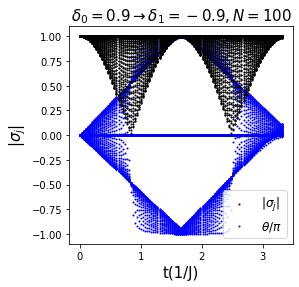

In [ ]:
fig = plt.figure(figsize=(4,4))
delta0 = 0.9
delta1 = -0.9
J = 1
N = 100
tc = t_critico_iguales(np.abs(delta0))
t = np.linspace(0,tc*4,cantidad)

for i in range(len(t)):
    LMatrix = Loschmidt_Matrix_OBC(t[i], delta0, delta1)
    Val, vec = np.linalg.eig(LMatrix)
    for j in range(len(Val)):
        
        if(i == 0 and j == 0):
            plt.scatter(t[i], np.abs(Val[j]), c = "black", s = 1, zorder = 20, label = r'$|\sigma_{j}|$')
            plt.scatter(t[i], cmath.phase(Val[j])/np.pi, c = "blue", s = 1, label = r'$\theta / \pi$')
        else:
            plt.scatter(t[i], np.abs(Val[j]), c = "black", s = 1, zorder = 20)
            plt.scatter(t[i], cmath.phase(Val[j])/np.pi, c = "blue", s = 1)
            
plt.ylabel(r'$|\sigma_{j}|$', fontsize = 15)
plt.xlabel('t(1/J)', fontsize = 15)
plt.legend(fontsize = 12)
plt.title(r'$\delta_{0} = 0.9 \rightarrow \delta_{1} = -0.9, N = 100$',fontsize= 15)
plt.savefig('Lambdas_MATRIX_1.pdf', dpi=600, bbox_inches='tight')

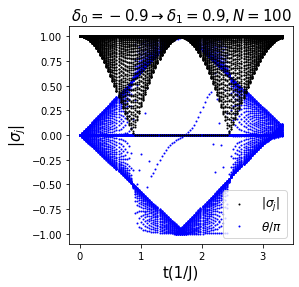

In [ ]:
fig = plt.figure(figsize=(4,4))
delta0 = -0.9
delta1 = 0.9
J = 1
N = 100
tc = t_critico_iguales(np.abs(delta0))
t = np.linspace(0,tc*4,cantidad)

for i in range(len(t)):
    LMatrix = Loschmidt_Matrix_OBC(t[i], delta0, delta1)
    Val, vec = np.linalg.eig(LMatrix)
    for j in range(len(Val)):
        
        if(i == 0 and j == 0):
            plt.scatter(t[i], np.abs(Val[j]), c = "black", s = 1, zorder = 20, label = r'$|\sigma_{j}|$')
            plt.scatter(t[i], cmath.phase(Val[j])/np.pi, c = "blue", s = 1, label = r'$\theta / \pi$')
        else:
            plt.scatter(t[i], np.abs(Val[j]), c = "black", s = 1, zorder = 20)
            plt.scatter(t[i], cmath.phase(Val[j])/np.pi, c = "blue", s = 1)
            
plt.ylabel(r'$|\sigma_{j}|$', fontsize = 15)
plt.xlabel('t(1/J)', fontsize = 15)
plt.legend(fontsize = 12)
plt.title(r'$\delta_{0} = -0.9 \rightarrow \delta_{1} = 0.9, N = 100$',fontsize= 15)
plt.savefig('Lambdas_MATRIX_2.pdf', dpi=600, bbox_inches='tight')

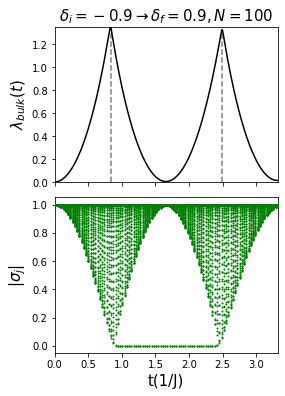

In [ ]:
fig = plt.figure(figsize = (4,6))
gs = fig.add_gridspec(2, hspace=0.1)
axs = gs.subplots(sharex=True, sharey=False)

delta0 = -0.9
delta1 = 0.9
J = 1
N = 100
tc = t_critico_iguales(np.abs(delta0))

t = np.linspace(0,tc*4,cantidad)
l = Loschmidt_rate_PBC(delta0,delta1,1,N,np.linspace(0,tc*4,1000))

tcs = np.array([0,2,4])
for i in range(len(tcs)-1):
    ti = np.linspace(tcs[i], tcs[i+1], 200)
    li = Loschmidt_rate_PBC(delta0,delta1,1,N,ti)
    timax = ti[np.argmax(li)]
    axs[0].plot([timax,timax], [0,np.max(li)], '--', c = "gray")

axs[0].plot(np.linspace(0,tc*4,1000),l, c = "black")
axs[0].set_ylabel(r'$\lambda_{bulk} (t) $',fontsize= 15)
axs[1].set_xlabel('t(1/J)',fontsize= 15)
axs[0].set_title(r'$\delta_{i} = -0.9 \rightarrow \delta_{f} = 0.9, N = 100$',fontsize= 15)
axs[0].set_xlim(0, np.max(t))
axs[0].set_ylim(0, np.max(l))
axs[1].set_xlim(0, np.max(t))

for i in range(len(t)):
    LMatrix = Loschmidt_Matrix_OBC(t[i], delta0, delta1)
    Val, vec = np.linalg.eig(LMatrix)
    for j in range(len(Val)):
        
        if(i == 0 and j == 0):
            axs[1].scatter(t[i], np.abs(Val[j]), c = "green", s = 1, zorder = 20, label = r'$|\sigma_{j}|$')
            #plt.scatter(t[i], cmath.phase(Val[j])/np.pi, c = "blue", s = 1, label = r'$\theta / \pi$')
        else:
            axs[1].scatter(t[i], np.abs(Val[j]), c = "green", s = 1, zorder = 20)
            #plt.scatter(t[i], cmath.phase(Val[j])/np.pi, c = "blue", s = 1)
            
axs[1].set_ylabel(r'$|\sigma_{j}|$', fontsize = 15)
axs[1].set_xlabel('t(1/J)', fontsize = 15)
plt.savefig('Lambdas_MATRIX_3.pdf', dpi=600, bbox_inches='tight')

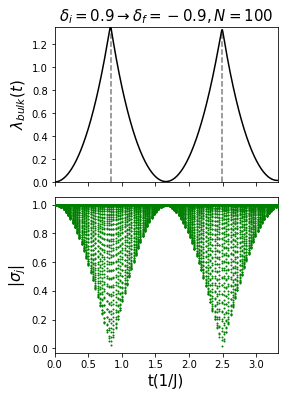

In [ ]:
fig = plt.figure(figsize = (4,6))
gs = fig.add_gridspec(2, hspace=0.1)
axs = gs.subplots(sharex=True, sharey=False)

delta0 = 0.9
delta1 = -0.9
J = 1
N = 100
tc = t_critico_iguales(np.abs(delta0))

t = np.linspace(0,tc*4,cantidad)
l = Loschmidt_rate_PBC(delta0,delta1,1,N,np.linspace(0,tc*4,1000))

tcs = np.array([0,2,4])
for i in range(len(tcs)-1):
    ti = np.linspace(tcs[i], tcs[i+1], 200)
    li = Loschmidt_rate_PBC(delta0,delta1,1,N,ti)
    timax = ti[np.argmax(li)]
    axs[0].plot([timax,timax], [0,np.max(li)], '--', c = "gray")

axs[0].plot(np.linspace(0,tc*4,1000),l, c = "black")
axs[0].set_ylabel(r'$\lambda_{bulk} (t) $',fontsize= 15)
axs[1].set_xlabel('t(1/J)',fontsize= 15)
axs[0].set_title(r'$\delta_{i} = 0.9 \rightarrow \delta_{f} = -0.9, N = 100$',fontsize= 15)
axs[0].set_xlim(0, np.max(t))
axs[0].set_ylim(0, np.max(l))
axs[1].set_xlim(0, np.max(t))

for i in range(len(t)):
    LMatrix = Loschmidt_Matrix_OBC(t[i], delta0, delta1)
    Val, vec = np.linalg.eig(LMatrix)
    for j in range(len(Val)):
        
        if(i == 0 and j == 0):
            axs[1].scatter(t[i], np.abs(Val[j]), c = "green", s = 1, zorder = 20, label = r'$|\sigma_{j}|$')
            #plt.scatter(t[i], cmath.phase(Val[j])/np.pi, c = "blue", s = 1, label = r'$\theta / \pi$')
        else:
            axs[1].scatter(t[i], np.abs(Val[j]), c = "green", s = 1, zorder = 20)
            #plt.scatter(t[i], cmath.phase(Val[j])/np.pi, c = "blue", s = 1)
            
axs[1].set_ylabel(r'$|\sigma_{j}|$', fontsize = 15)
axs[1].set_xlabel('t(1/J)', fontsize = 15)
plt.savefig('Lambdas_MATRIX_4.pdf', dpi=600, bbox_inches='tight')

In [ ]:
def LE_OBC_Lambdas(t, delta0, delta1):
    global N
    le = np.array([])
    for j in range(len(t)):
        LMatrix = Loschmidt_Matrix_OBC(t[j], delta0, delta1)
        Val, vec = np.linalg.eig(LMatrix)
        suma = 0
        for i in range(len(Val)):
            suma = suma + 2*np.log(np.abs(Val[i]))
        le = np.append(le, -suma/N)
    return le

Text(0.5, 1.0, '$\\delta_{i} = -0.95 \\rightarrow \\delta_{f} = 0.95$')

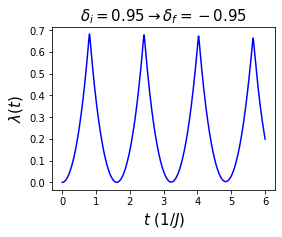

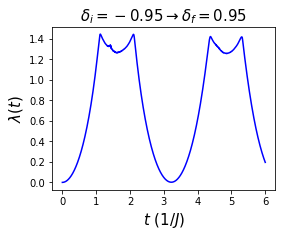

In [ ]:
fig = plt.figure(figsize=(4,3))
delta0 = 0.95
delta1 = -0.95
J = 1
N = 100
t = np.linspace(0,6,1000)
l = LE_OBC_Lambdas(t, delta0, delta1)

plt.plot(t,l,c = 'blue')
plt.xlabel(r'$t (1/J)$',fontsize= 15)
plt.ylabel(r'$\lambda(t)$',fontsize= 15)
plt.title(r'$\delta_{i} = 0.95 \rightarrow \delta_{f} = -0.95$',fontsize= 15)

fig = plt.figure(figsize=(4,3))
delta0 = -0.95
delta1 = 0.95
J = 1
N = 100
t = np.linspace(0,6,1000)
l = LE_OBC_Lambdas(t, delta0, delta1)

plt.plot(t,l,c = 'blue')
plt.xlabel(r'$t (1/J)$',fontsize= 15)
plt.ylabel(r'$\lambda(t)$',fontsize= 15)
plt.title(r'$\delta_{i} = -0.95 \rightarrow \delta_{f} = 0.95$',fontsize= 15)

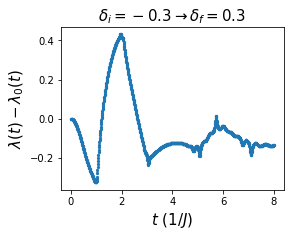

In [ ]:
fig = plt.figure(figsize=(4,3))
delta0 = -0.3
delta1 = 0.3
J = 1
N = 100
tc = t_critico_iguales(np.abs(delta0))
t = np.linspace(0,tc*8,1000)

lt = LE_OBC_Lambdas(t, delta0, delta1)
l0 = Loschmidt_rate_PBC(delta0,delta1,J,N,t)

lb = (lt - l0)
#for i in range(len(lb)):
    #if(lb[i] <= 0):
        #lb[i] = 0
plt.scatter(t/tc,lb, s = 5)
plt.xlabel(r'$t (1/J)$',fontsize= 15)
plt.ylabel(r'$\lambda(t) - \lambda_{0}(t)$',fontsize= 15)
plt.title(r'$\delta_{i} = -0.3 \rightarrow \delta_{f} = 0.3$',fontsize= 15)
plt.savefig('LB_1.pdf', dpi=600, bbox_inches='tight')

In [ ]:
#Intentemos usando los valores propios de la matriz.

def LB_OBC_Lambdas(t, delta0, delta1):
    global N
    LMatrix = Loschmidt_Matrix_OBC(t, delta0, delta1)
    Val, vec = np.linalg.eig(LMatrix)
    lambda1 = Val[np.argmin(np.abs(Val))]
    Val[np.argmin(np.abs(Val))] = 1
    lambda2 = Val[np.argmin(np.abs(Val))]
    return lambda1,lambda2

In [ ]:
cantidad = 200

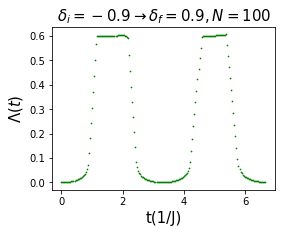

In [ ]:
fig = plt.figure(figsize=(4,3))

delta0 = -0.9
delta1 = 0.9
J = 1
N = 100
tc = t_critico_iguales(np.abs(delta0))
t = np.linspace(0,tc*8,cantidad)
for i in range(len(t)):
    lambda1, lambda2 =  LB_OBC_Lambdas(t[i], delta0, delta1)
    valor = -1*np.log(np.abs(lambda1*lambda2))/N
    plt.scatter(t[i], valor, c = "green", s = 0.5, zorder = 20)
plt.ylabel(r'$\Lambda(t)$',fontsize= 15)
plt.xlabel('t(1/J)',fontsize= 15)
plt.title(r'$\delta_{i} = -0.9 \rightarrow \delta_{f} = 0.9, N = 100$',fontsize= 15)
plt.savefig('LB_Lambdas_1.pdf', dpi=600, bbox_inches='tight')

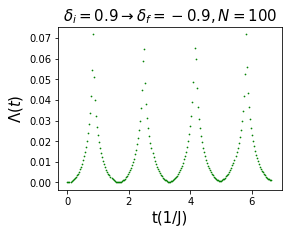

In [ ]:
fig = plt.figure(figsize=(4,3))

delta0 = 0.9
delta1 = -0.9
J = 1
N = 100
tc = t_critico_iguales(np.abs(delta0))
t = np.linspace(0,tc*8,cantidad)
for i in range(len(t)):
    lambda1, lambda2 =  LB_OBC_Lambdas(t[i], delta0, delta1)
    valor = -1*np.log(np.abs(lambda1*lambda2))/N
    plt.scatter(t[i], valor, c = "green", s = 0.5, zorder = 20)
plt.ylabel(r'$\Lambda(t)$',fontsize= 15)
plt.xlabel('t(1/J)',fontsize= 15)
plt.title(r'$\delta_{i} = 0.9 \rightarrow \delta_{f} = -0.9, N = 100$',fontsize= 15)
plt.savefig('LB_Lambdas_2.pdf', dpi=600, bbox_inches='tight')

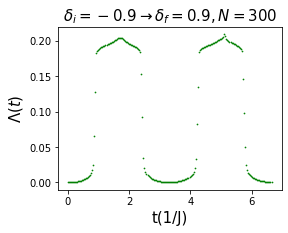

In [ ]:
fig = plt.figure(figsize=(4,3))

delta0 = -0.9
delta1 = 0.9
J = 1
N = 300
tc = t_critico_iguales(np.abs(delta0))
t = np.linspace(0,tc*8,cantidad)
for i in range(len(t)):
    lambda1, lambda2 =  LB_OBC_Lambdas(t[i], delta0, delta1)
    valor = -1*np.log(np.abs(lambda1*lambda2))/N
    plt.scatter(t[i], valor, c = "green", s = 0.5, zorder = 20)
plt.ylabel(r'$\Lambda(t)$',fontsize= 15)
plt.xlabel('t(1/J)',fontsize= 15)
plt.title(r'$\delta_{i} = -0.9 \rightarrow \delta_{f} = 0.9, N = 300$',fontsize= 15)
plt.savefig('LB_Lambdas_3.pdf', dpi=600, bbox_inches='tight')

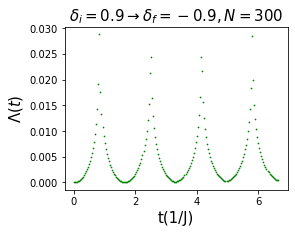

In [ ]:
fig = plt.figure(figsize=(4,3))

delta0 = 0.9
delta1 = -0.9
J = 1
N = 300
tc = t_critico_iguales(np.abs(delta0))
t = np.linspace(0,tc*8,cantidad)
for i in range(len(t)):
    lambda1, lambda2 =  LB_OBC_Lambdas(t[i], delta0, delta1)
    valor = -1*np.log(np.abs(lambda1*lambda2))/N
    plt.scatter(t[i], valor, c = "green", s = 0.5, zorder = 20)
plt.ylabel(r'$\Lambda(t)$',fontsize= 15)
plt.xlabel('t(1/J)',fontsize= 15)
plt.title(r'$\delta_{i} = 0.9 \rightarrow \delta_{f} = -0.9, N = 300$',fontsize= 15)
plt.savefig('LB_Lambdas_4.pdf', dpi=600, bbox_inches='tight')

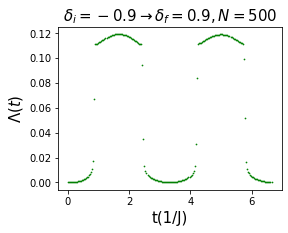

In [ ]:
fig = plt.figure(figsize=(4,3))

delta0 = -0.9
delta1 = 0.9
J = 1
N = 500
tc = t_critico_iguales(np.abs(delta0))
t = np.linspace(0,tc*8,cantidad)
for i in range(len(t)):
    lambda1, lambda2 =  LB_OBC_Lambdas(t[i], delta0, delta1)
    valor = -1*np.log(np.abs(lambda1*lambda2))/N
    plt.scatter(t[i], valor, c = "green", s = 0.5, zorder = 20)
plt.ylabel(r'$\Lambda(t)$',fontsize= 15)
plt.xlabel('t(1/J)',fontsize= 15)
plt.title(r'$\delta_{i} = -0.9 \rightarrow \delta_{f} = 0.9, N = 500$',fontsize= 15)
plt.savefig('LB_Lambdas_5.pdf', dpi=600, bbox_inches='tight')

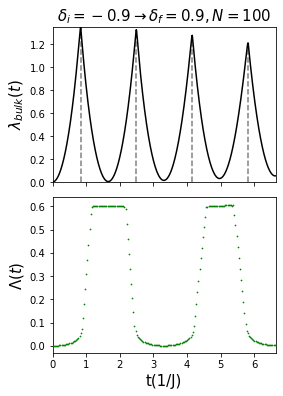

In [ ]:
fig = plt.figure(figsize = (4,6))
gs = fig.add_gridspec(2, hspace=0.1)
axs = gs.subplots(sharex=True, sharey=False)

delta0 = -0.9
delta1 = 0.9
J = 1
N = 100
tc = t_critico_iguales(np.abs(delta0))

t = np.linspace(0,tc*8,cantidad)
l = Loschmidt_rate_PBC(delta0,delta1,1,N,np.linspace(0,tc*8,1000))

tcs = np.array([0,2,4,5,6])
for i in range(len(tcs)-1):
    ti = np.linspace(tcs[i], tcs[i+1], 200)
    li = Loschmidt_rate_PBC(delta0,delta1,1,N,ti)
    timax = ti[np.argmax(li)]
    axs[0].plot([timax,timax], [0,np.max(li)], '--', c = "gray")

axs[0].plot(np.linspace(0,tc*8,1000),l, c = "black")
axs[0].set_ylabel(r'$\lambda_{bulk} (t) $',fontsize= 15)
axs[1].set_xlabel('t(1/J)',fontsize= 15)
axs[0].set_title(r'$\delta_{i} = -0.9 \rightarrow \delta_{f} = 0.9, N = 100$',fontsize= 15)
axs[0].set_xlim(0, np.max(t))
axs[0].set_ylim(0, np.max(l))
axs[1].set_xlim(0, np.max(t))

for i in range(len(t)):
    lambda1, lambda2 =  LB_OBC_Lambdas(t[i], delta0, delta1)
    valor = -1*np.log(np.abs(lambda1*lambda2))/N
    axs[1].scatter(t[i], valor, c = "green", s = 0.5, zorder = 20)
axs[1].set_ylabel(r'$\Lambda(t)$',fontsize= 15)
axs[1].set_xlabel('t(1/J)',fontsize= 15)
plt.savefig('LB_Lambdas_6.pdf', dpi=600, bbox_inches='tight')

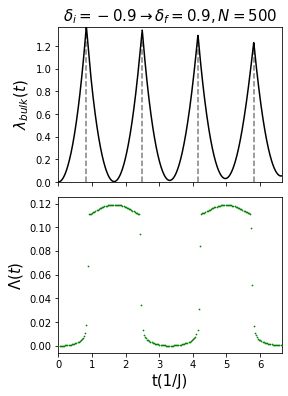

In [ ]:
fig = plt.figure(figsize = (4,6))
gs = fig.add_gridspec(2, hspace=0.1)
axs = gs.subplots(sharex=True, sharey=False)

delta0 = -0.9
delta1 = 0.9
J = 1
N = 500
tc = t_critico_iguales(np.abs(delta0))

t = np.linspace(0,tc*8,cantidad)
l = Loschmidt_rate_PBC(delta0,delta1,1,N,np.linspace(0,tc*8,1000))

tcs = np.array([0,2,4,5,6])
for i in range(len(tcs)-1):
    ti = np.linspace(tcs[i], tcs[i+1], 200)
    li = Loschmidt_rate_PBC(delta0,delta1,1,N,ti)
    timax = ti[np.argmax(li)]
    axs[0].plot([timax,timax], [0,np.max(li)], '--', c = "gray")

axs[0].plot(np.linspace(0,tc*8,1000),l, c = "black")
axs[0].set_ylabel(r'$\lambda_{bulk} (t) $',fontsize= 15)
axs[1].set_xlabel('t(1/J)',fontsize= 15)
axs[0].set_title(r'$\delta_{i} = -0.9 \rightarrow \delta_{f} = 0.9, N = 500$',fontsize= 15)
axs[0].set_xlim(0, np.max(t))
axs[0].set_ylim(0, np.max(l))
axs[1].set_xlim(0, np.max(t))

for i in range(len(t)):
    lambda1, lambda2 =  LB_OBC_Lambdas(t[i], delta0, delta1)
    valor = -1*np.log(np.abs(lambda1*lambda2))/N
    axs[1].scatter(t[i], valor, c = "green", s = 0.5, zorder = 20)
axs[1].set_ylabel(r'$\Lambda(t)$',fontsize= 15)
axs[1].set_xlabel('t(1/J)',fontsize= 15)
plt.savefig('LB_Lambdas_7.pdf', dpi=600, bbox_inches='tight')